In [63]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [61]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [2]:
data = pd.read_csv("reed_uk.csv")
data['post_date'] = pd.to_datetime(data['post_date'], format='%m/%d/%Y')

In [5]:
data

category            city  \
0                           catering jobs       Chudleigh   
1                                law jobs         Swindon   
2                            factory jobs         Norfolk   
3                                law jobs  Hurstpierpoint   
4                            factory jobs   Hertfordshire   
...                                   ...             ...   
49995                        science jobs     Oxfordshire   
49996  graduate training internships jobs     Northampton   
49997           strategy consultancy jobs  City of London   
49998                     purchasing jobs           Egham   
49999                           fmcg jobs          London   

                               company_name geo job_board  \
0                           Haulfryn Group   uk      reed   
1                                     Reed   uk      reed   
2                Swanstaff Recruitment Ltd   uk      reed   
3                       Castles Solicitors   uk      reed   
4                        Marketplace Group   uk      reed   
...                                     ...  ..       ...   
49995  Hays Specialist Recruitment Limited   uk      reed   
49996                         The Graduate   uk      reed   
49997                 Capgemini Consulting   uk      reed   
49998              Concept Human Solutions   uk      reed   
49999                           D R Newitt   uk      reed   

                                         job_description  \
0       Apply now New opportunity not to be missed! H...   
1       Apply now This role requires an experienced s...   
2       Apply now Job Title: Warehouse personLocation...   
3       Apply now Castles Solicitors are looking for ...   
4       Apply now International Pharmaceutical Manufa...   
...                                                  ...   
49995   Apply now Scientist - Cell Based Assays - Neu...   
49996   Apply now Our client is looking for high achi...   
49997   Apply on employer's website Who youâ€™ll be w...   
49998   Apply now UNDERSTANDING, SERVICE, TRUST3 Word...   
49999   Apply now My client, highly successful, rapid...   

                                        job_requirements  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3       Required skills Admin Case Management Corresp...   
4                                                    NaN   
...                                                  ...   
49995                                                NaN   
49996   Required skills Blue Chip Communication Skill...   
49997                                                NaN   
49998                    Required skills Procurement AV    
49999       Required skills FMCG French Supply Planning    

                                               job_title  \
0                                            Commis Chef   
1                              Corporate Legal Secretary   
2                                       Warehouse Person   
3                      Legal Secretary / Admin Assistant   
4                      Category Planner - Pharmaceutical   
...                                                  ...   
49995   Scientist In vitro Cell-Free & Cell Based Assays   
49996             Graduate Training Scheme - Recruitment   
49997  Management Consultant - Retail Buying, Merchan...   
49998                           AV Procurement Assistant   
49999                  Supply Planner - French Speaking    

                                job_type  post_date  \
0                   Permanent, full-time  3/12/2018   
1                   Permanent, full-time   3/8/2018   
2                   Permanent, full-time  2/27/2018   
3      Permanent, full-time or part-time  2/21/2018   
4                   Permanent, full-time   3/1/2018   
...                                  ...        ...   
49995              

Text(0.5, 1.0, 'Boxplot of quantity of job listings by category')

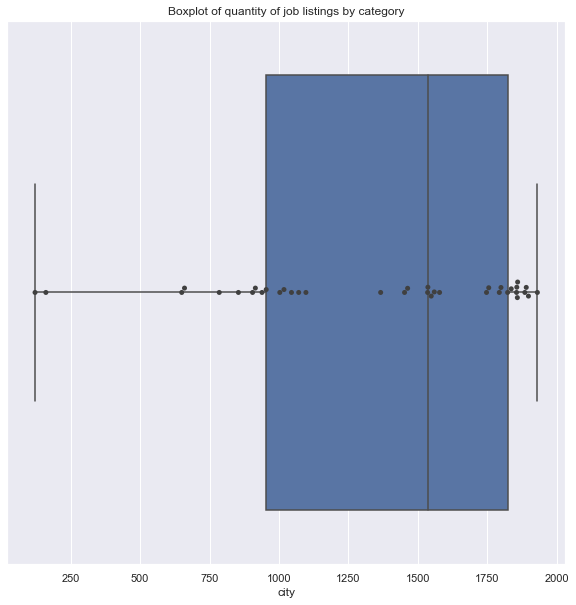

In [68]:
num_jobs_by_company = data.groupby(by='category').count().reset_index()
sns.set(rc={'figure.figsize':(10,10)})

ax = sns.boxplot(x=num_jobs_by_company["city"])
ax = sns.swarmplot(x=num_jobs_by_company["city"], color=".25")
plt.title('Boxplot of quantity of job listings by category')

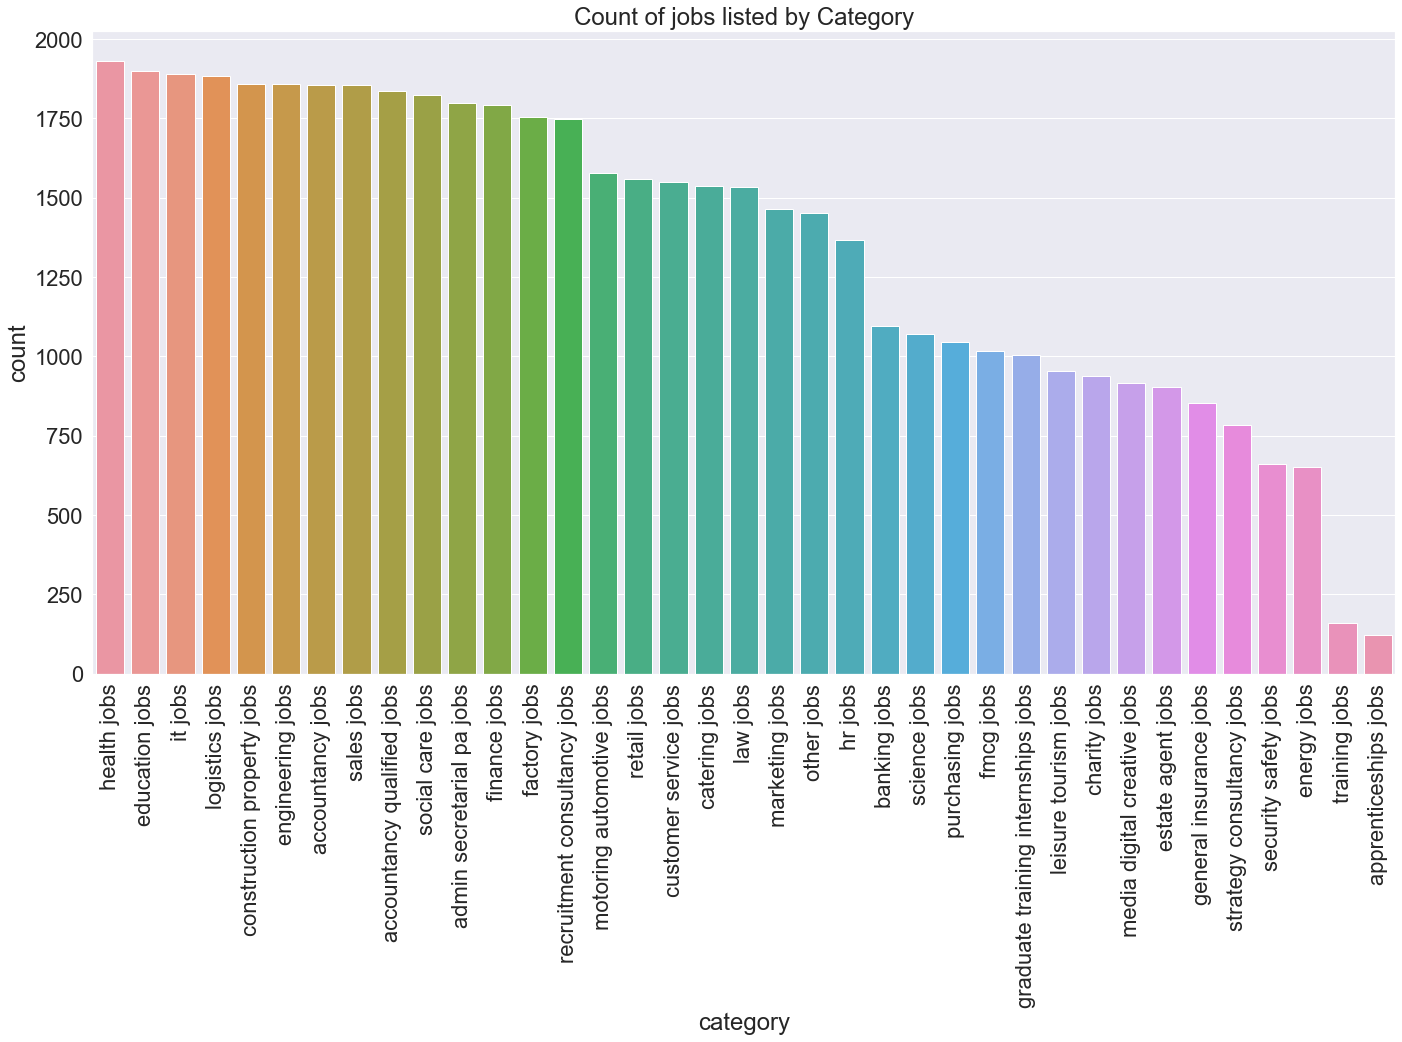

In [7]:
sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of jobs listed by Category')
ax = sns.countplot(x="category", data=data, order = data['category'].value_counts().index)

plt.xticks(rotation=90)
plt.tight_layout()

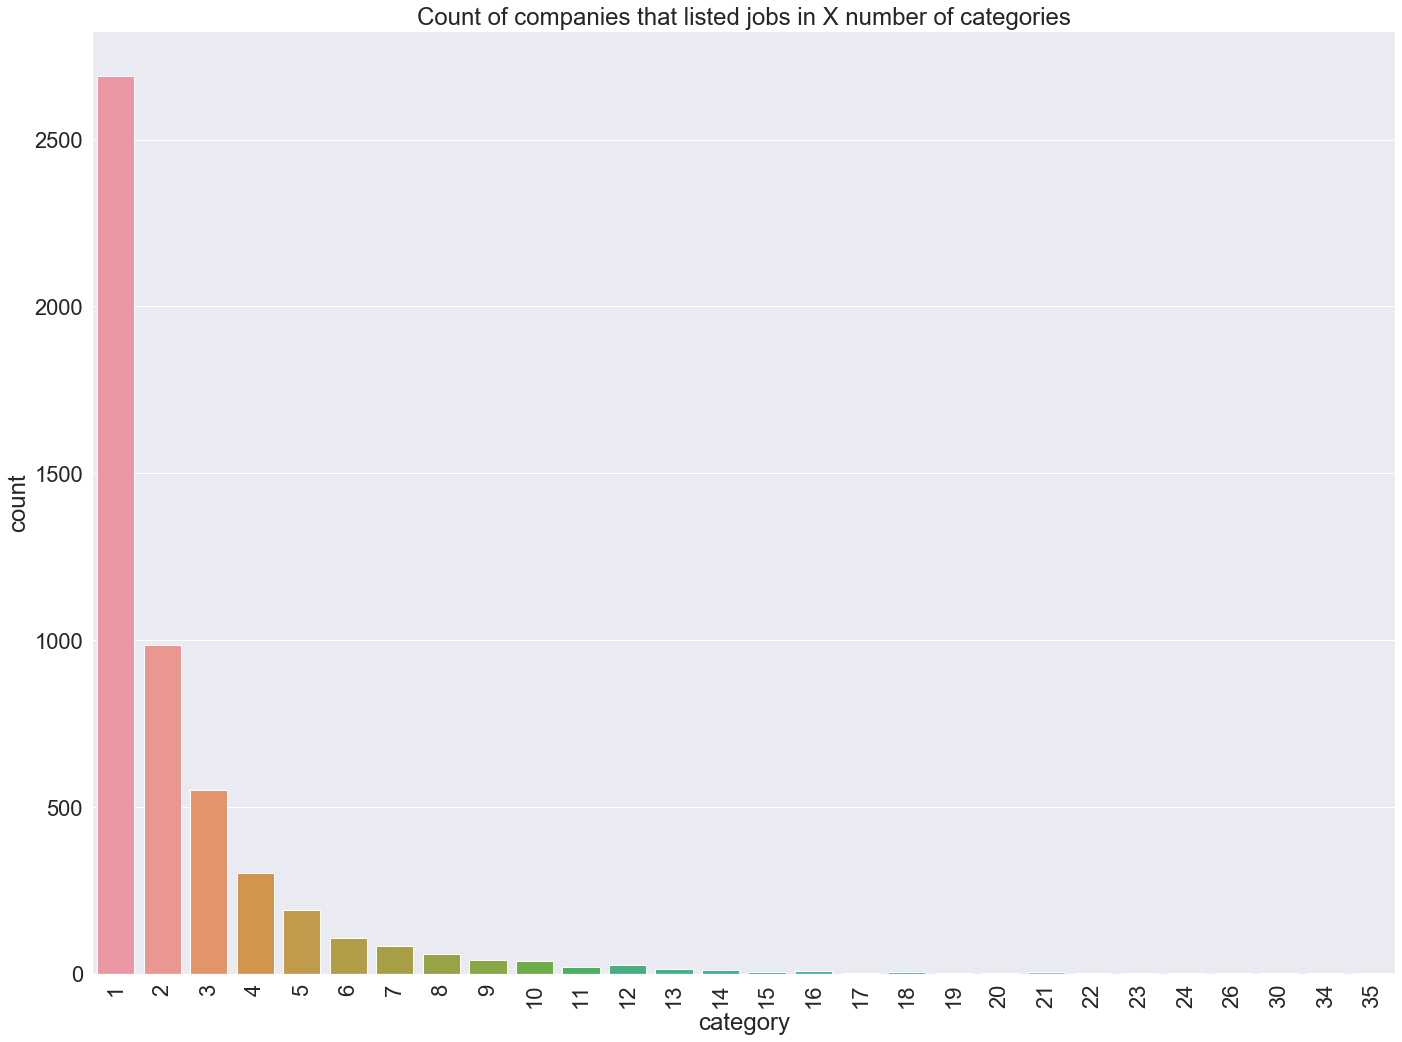

In [41]:
num_category_by_company = data.groupby(by='company_name', as_index=False).agg({'category': pd.Series.nunique})


sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of companies that listed jobs in X number of categories')
ax = sns.countplot(x="category", data=num_category_by_company)
plt.xticks(rotation=90)
plt.tight_layout()

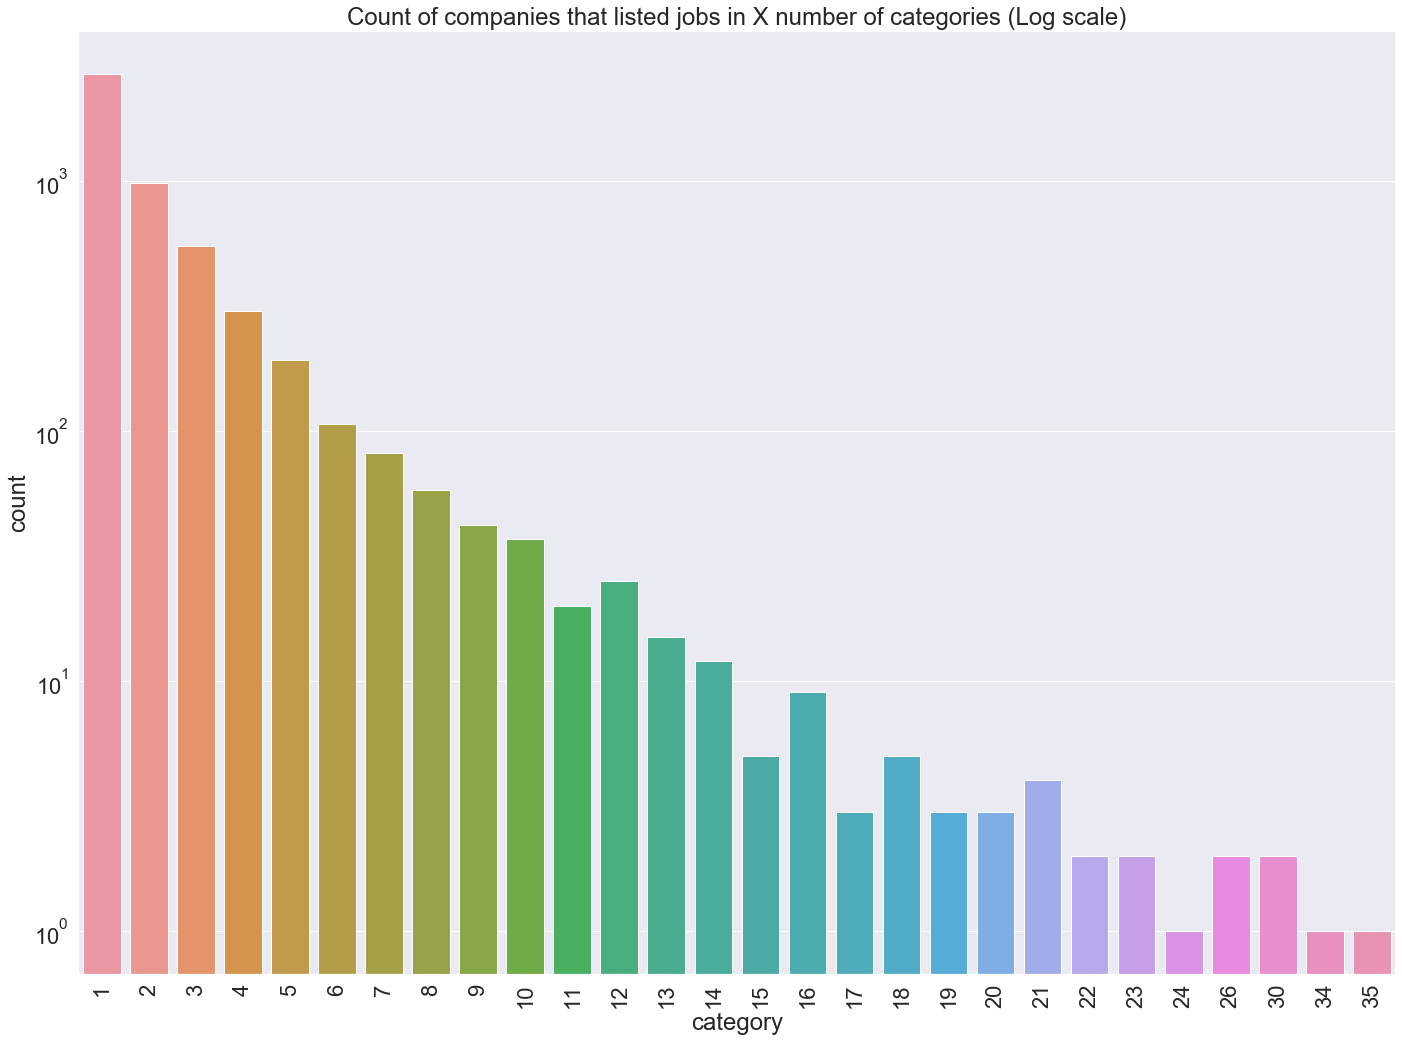

In [40]:
num_category_by_company = data.groupby(by='company_name', as_index=False).agg({'category': pd.Series.nunique})


sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of companies that listed jobs in X number of categories (Log scale)')
ax = sns.countplot(x="category", data=num_category_by_company)
ax.set_yscale("log")
plt.xticks(rotation=90)
plt.tight_layout()

Text(0.5, 1.0, 'Boxplot of quantity of job listings by company (log scale)')

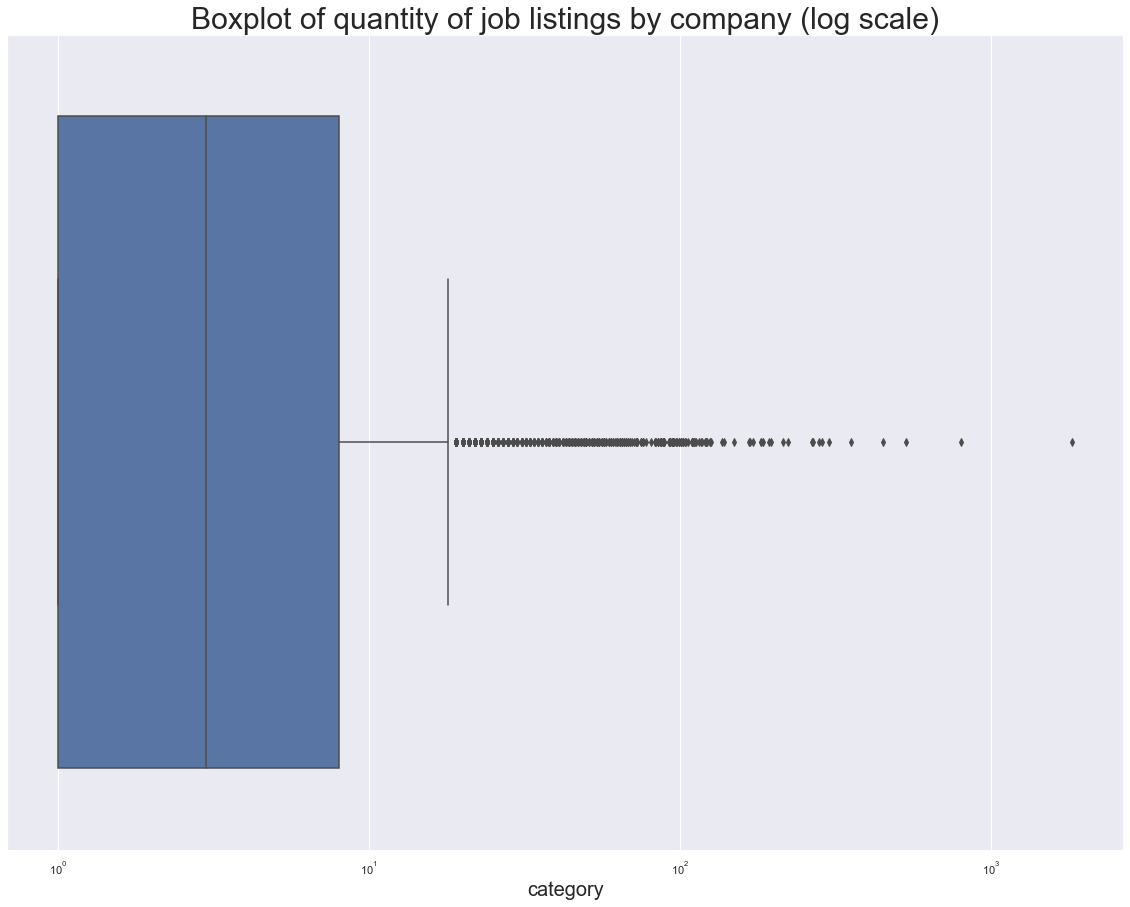

In [61]:
num_jobs_by_company = data.groupby(by='company_name').count().reset_index()

ax = sns.boxplot(x=num_jobs_by_company["category"])
ax.set_xscale("log")
plt.title('Boxplot of quantity of job listings by company (log scale)')

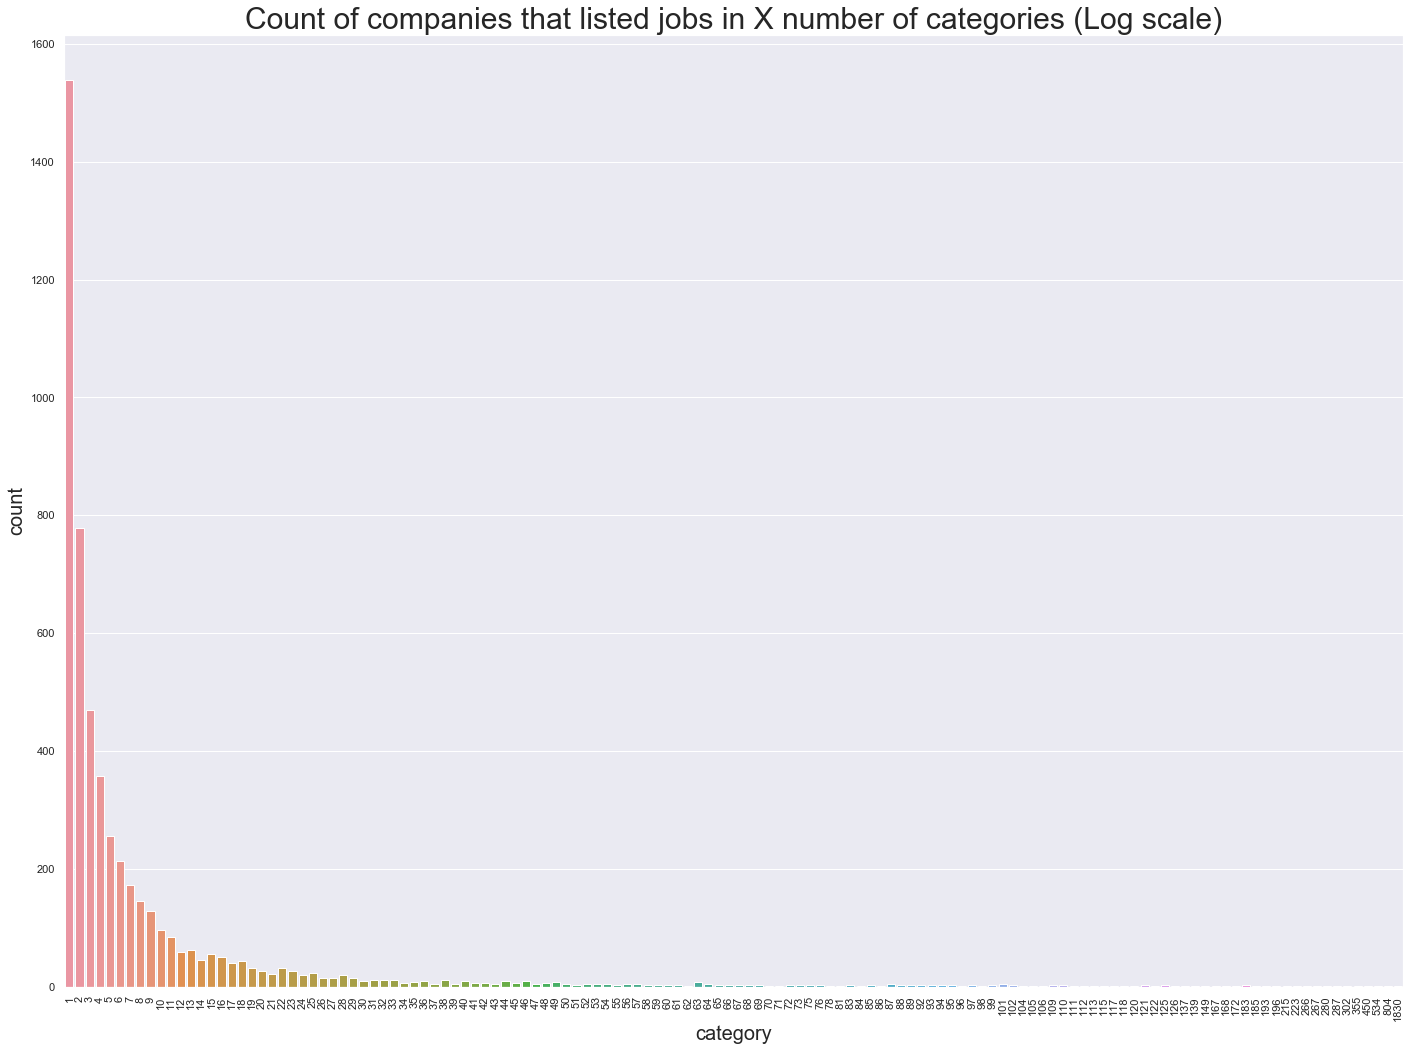

In [53]:
num_jobs_by_company = data.groupby(by='company_name').count().reset_index()

sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
plt.title('Count of companies that listed jobs in X number of categories (Log scale)')
ax = sns.countplot(x="category", data=num_jobs_by_company)
plt.xticks(rotation=90)
plt.tight_layout()

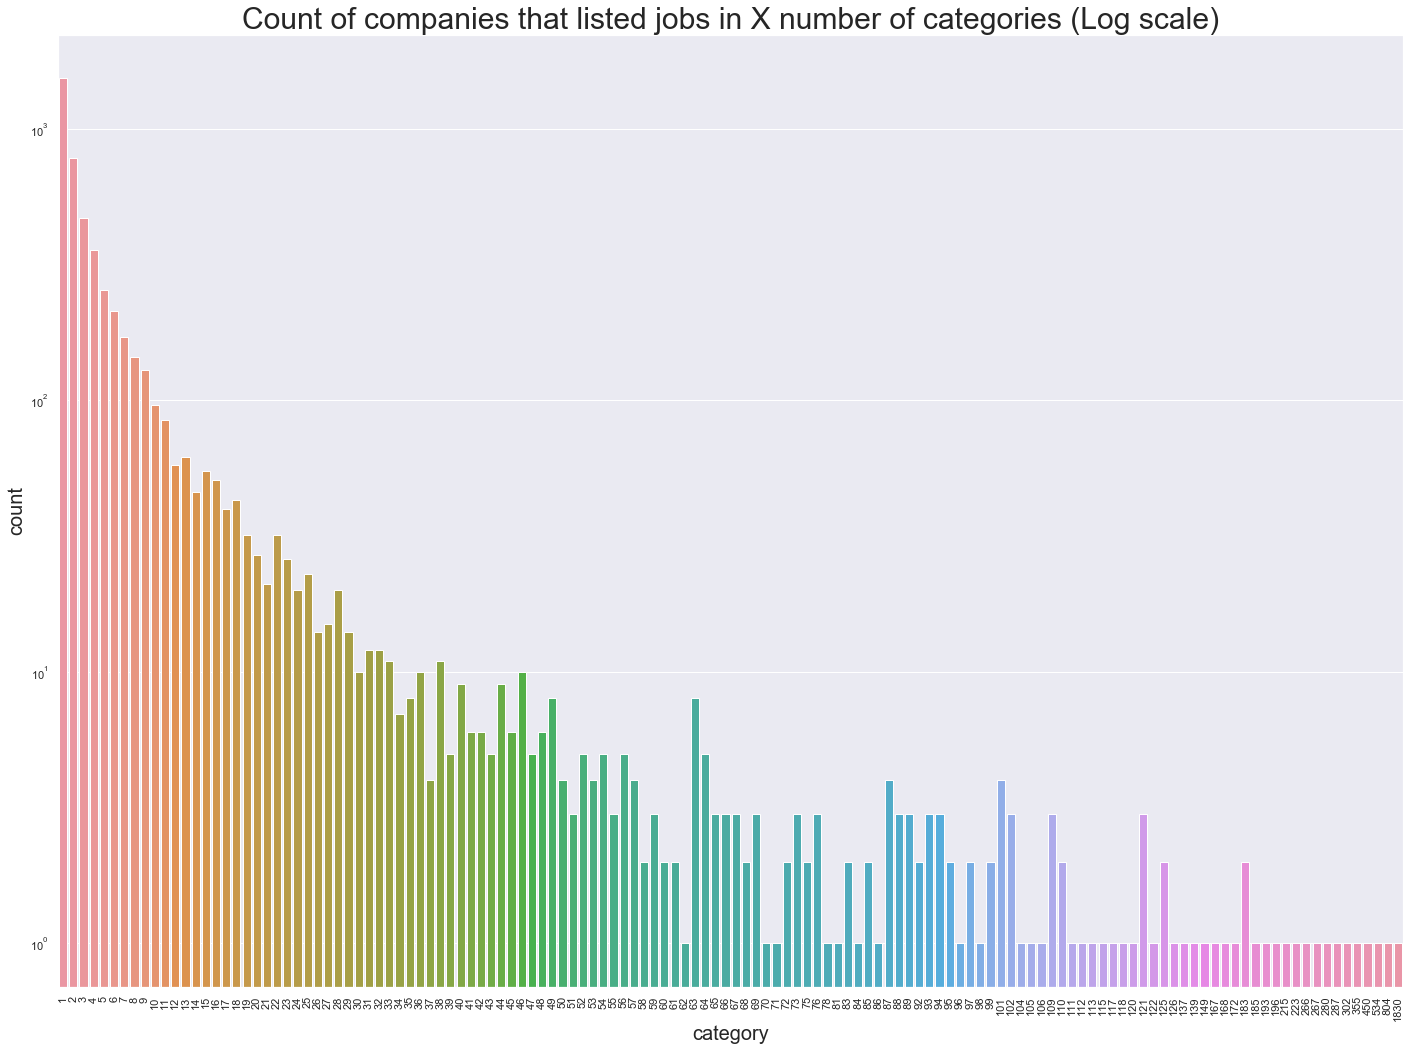

In [52]:
num_jobs_by_company = data.groupby(by='company_name').count().reset_index()

sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
plt.title('Count of companies that listed jobs in X number of categories (Log scale)')
ax = sns.countplot(x="category", data=num_jobs_by_company)
ax.set_yscale("log")
plt.xticks(rotation=90)
plt.tight_layout()

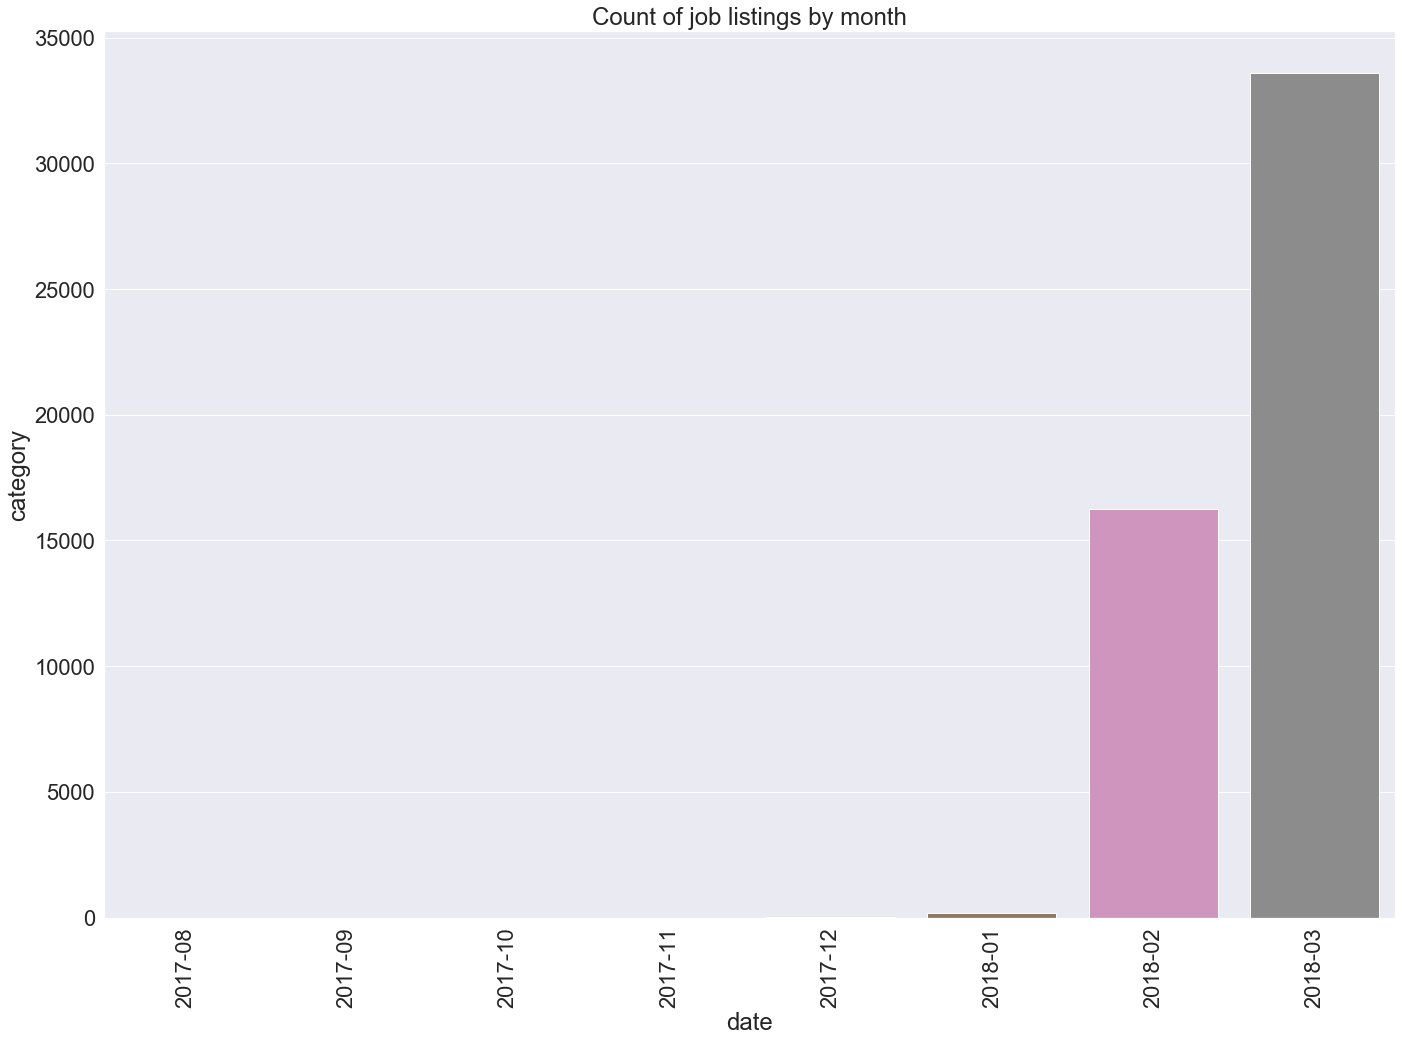

In [17]:
data_date = data.copy()
data_date = data_date.set_index("post_date")
num_listings_by_month = data_date.resample("M").count().reset_index()
num_listings_by_month["date"] = num_listings_by_month['post_date'].apply(lambda x: x.strftime('%Y-%m'))

sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of job listings by month')
ax = sns.barplot(x="date", y="category", data=num_listings_by_month)
plt.xticks(rotation=90)
plt.tight_layout()

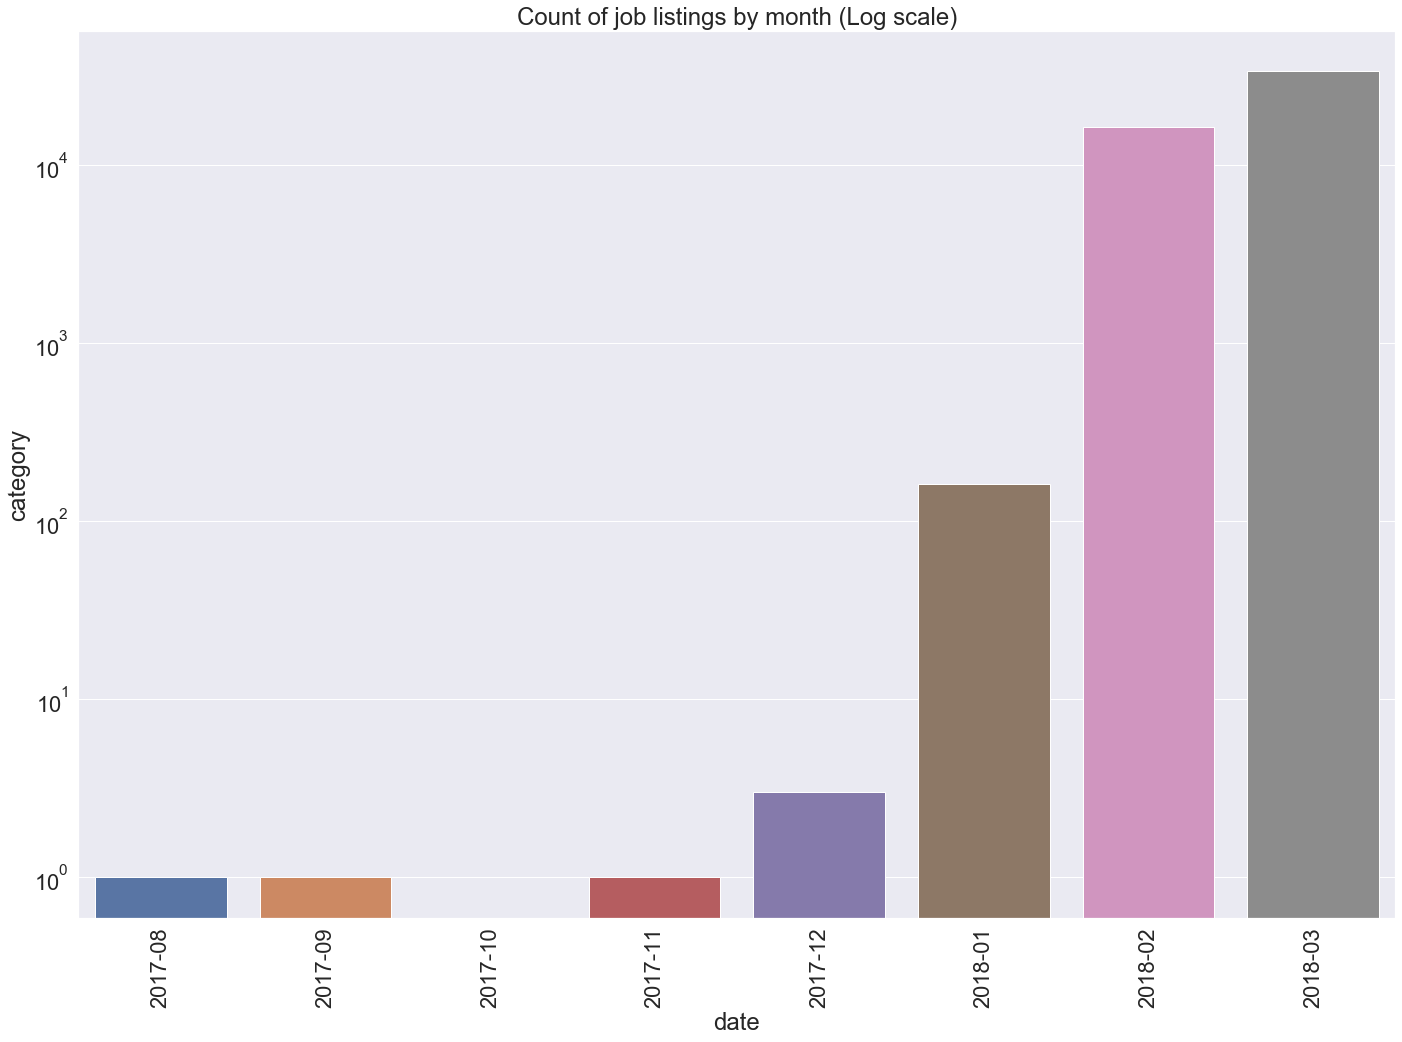

In [16]:
data_date = data.copy()
data_date = data_date.set_index("post_date")
num_listings_by_month = data_date.resample("M").count().reset_index()
num_listings_by_month["date"] = num_listings_by_month['post_date'].apply(lambda x: x.strftime('%Y-%m'))

sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of job listings by month (Log scale)')
ax = sns.barplot(x="date", y="category", data=num_listings_by_month)
ax.set_yscale("log")
plt.xticks(rotation=90)
plt.tight_layout()

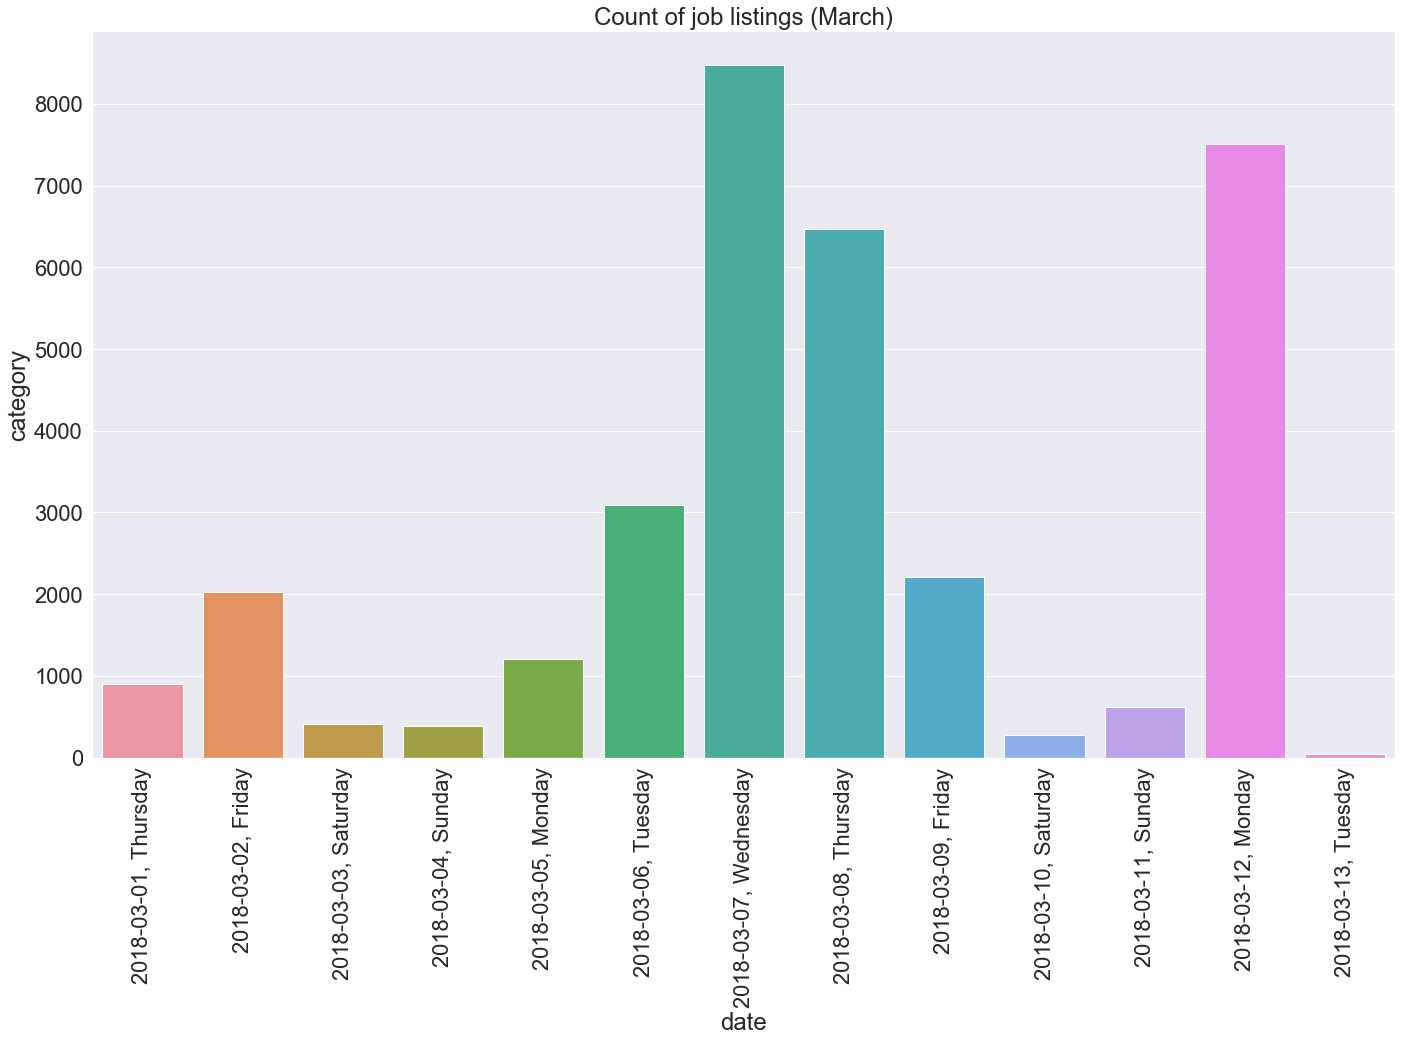

In [30]:

data_date = data[data["post_date"] >= "20180301"].copy()
data_date = data_date.set_index("post_date")
num_listings_by_month = data_date.resample("D").count().reset_index()
num_listings_by_month["date"] = num_listings_by_month['post_date'].apply(lambda x: x.strftime('%Y-%m-%d, %A'))

sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of job listings (March)')
ax = sns.barplot(x="date", y="category", data=num_listings_by_month)

plt.xticks(rotation=90)
plt.tight_layout()

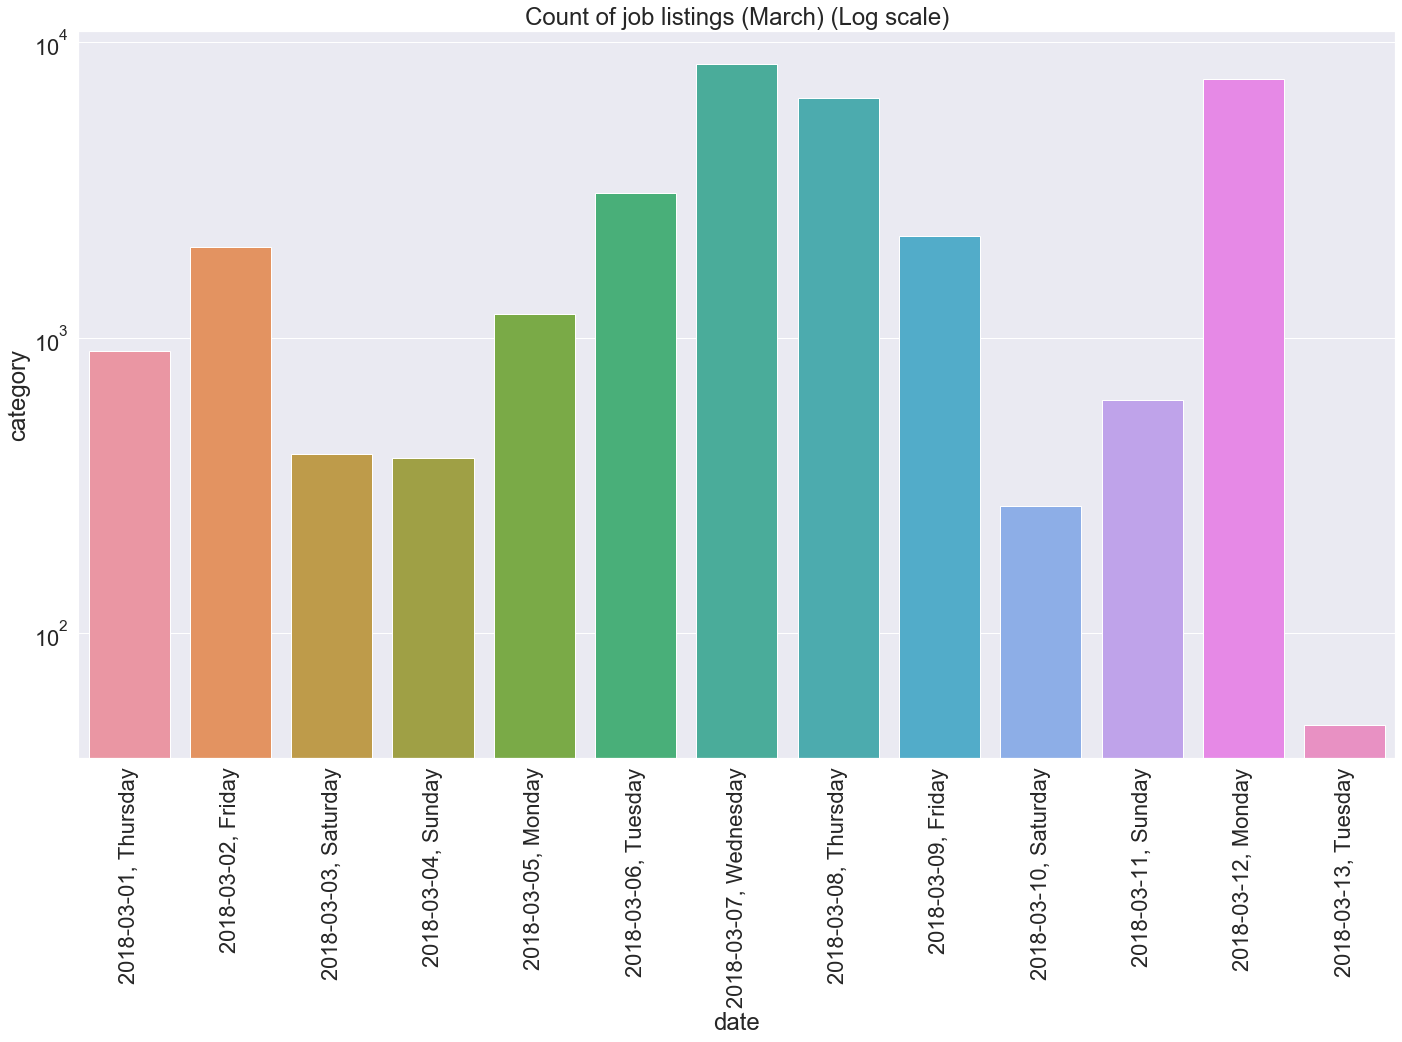

In [31]:

data_date = data[data["post_date"] >= "20180301"].copy()
data_date = data_date.set_index("post_date")
num_listings_by_month = data_date.resample("D").count().reset_index()
num_listings_by_month["date"] = num_listings_by_month['post_date'].apply(lambda x: x.strftime('%Y-%m-%d, %A'))

sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of job listings (March) (Log scale)')
ax = sns.barplot(x="date", y="category", data=num_listings_by_month)
ax.set_yscale("log")
plt.xticks(rotation=90)
plt.tight_layout()

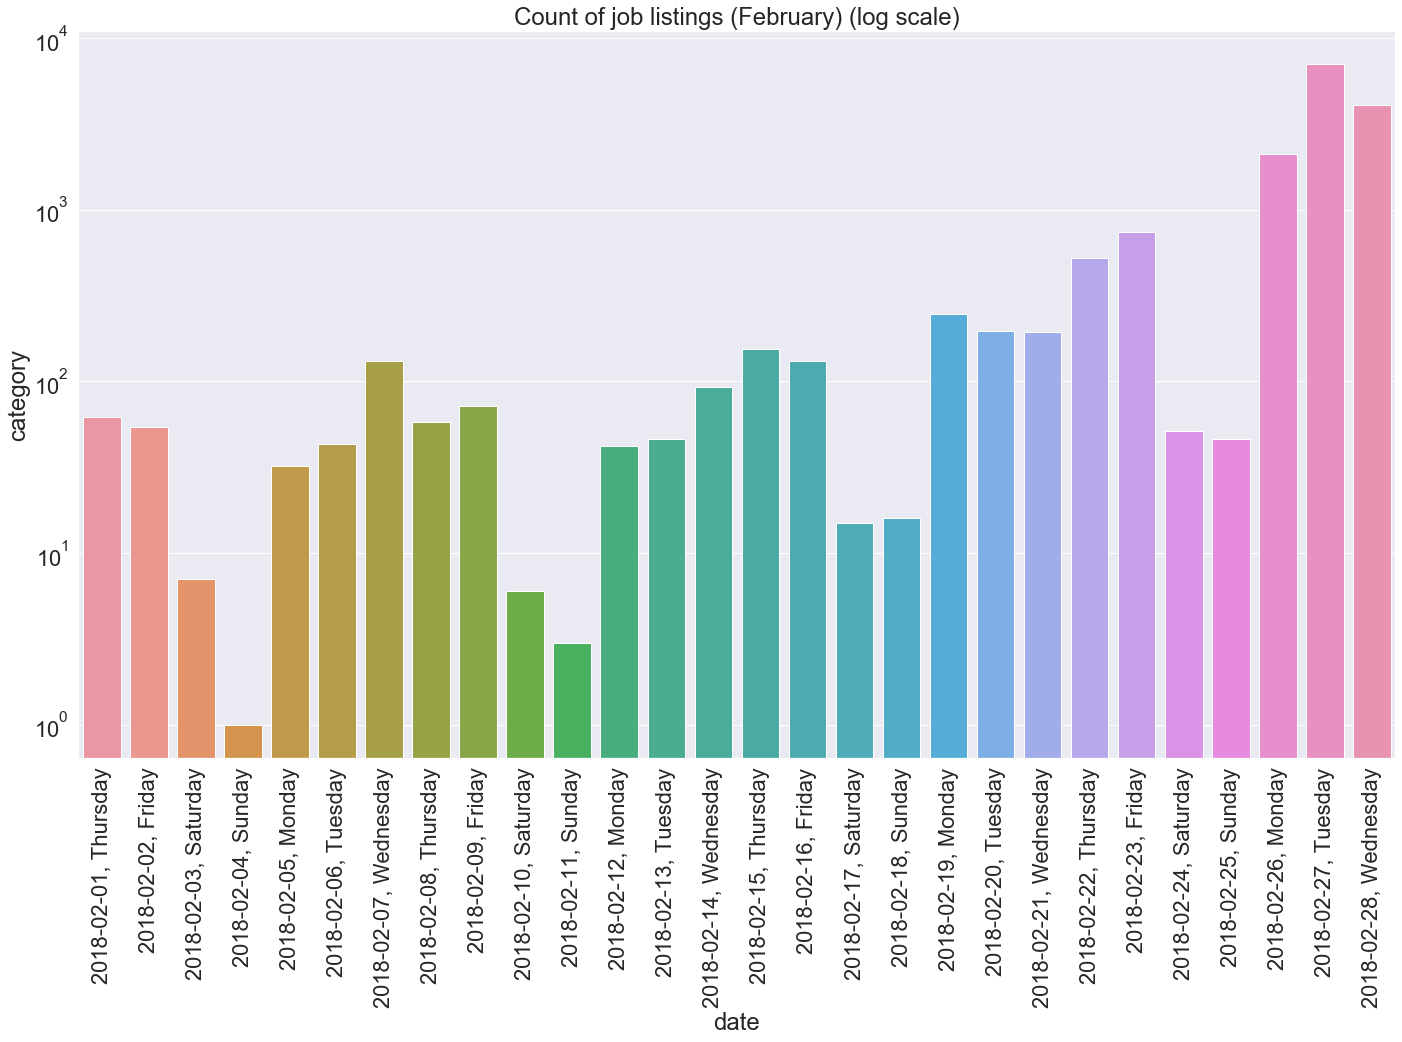

In [34]:
data_date = data.loc[(data["post_date"] >= "20180201") & (data["post_date"] < "20180301")].copy()
data_date = data_date.set_index("post_date")
num_listings_by_month = data_date.resample("D").count().reset_index()
num_listings_by_month["date"] = num_listings_by_month['post_date'].apply(lambda x: x.strftime('%Y-%m-%d, %A'))

sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of job listings (February) (log scale)')
ax = sns.barplot(x="date", y="category", data=num_listings_by_month)
ax.set_yscale("log")
plt.xticks(rotation=90)
plt.tight_layout()

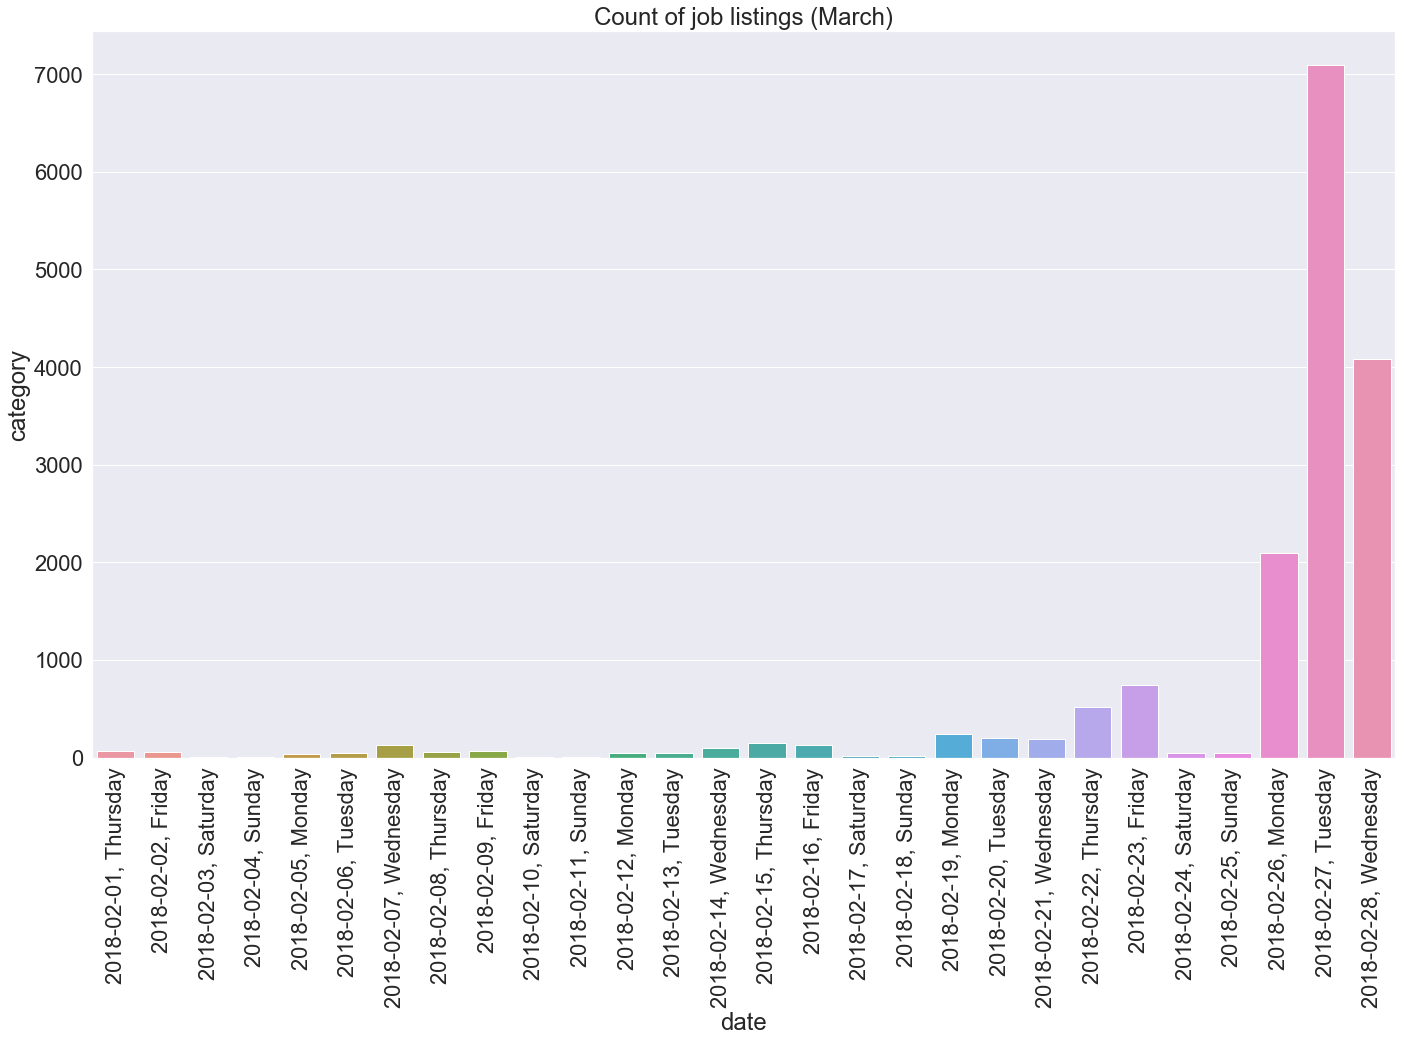

In [35]:
data_date = data.loc[(data["post_date"] >= "20180201") & (data["post_date"] < "20180301")].copy()
data_date = data_date.set_index("post_date")
num_listings_by_month = data_date.resample("D").count().reset_index()
num_listings_by_month["date"] = num_listings_by_month['post_date'].apply(lambda x: x.strftime('%Y-%m-%d, %A'))

sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of job listings (February)')
ax = sns.barplot(x="date", y="category", data=num_listings_by_month)

plt.xticks(rotation=90)
plt.tight_layout()

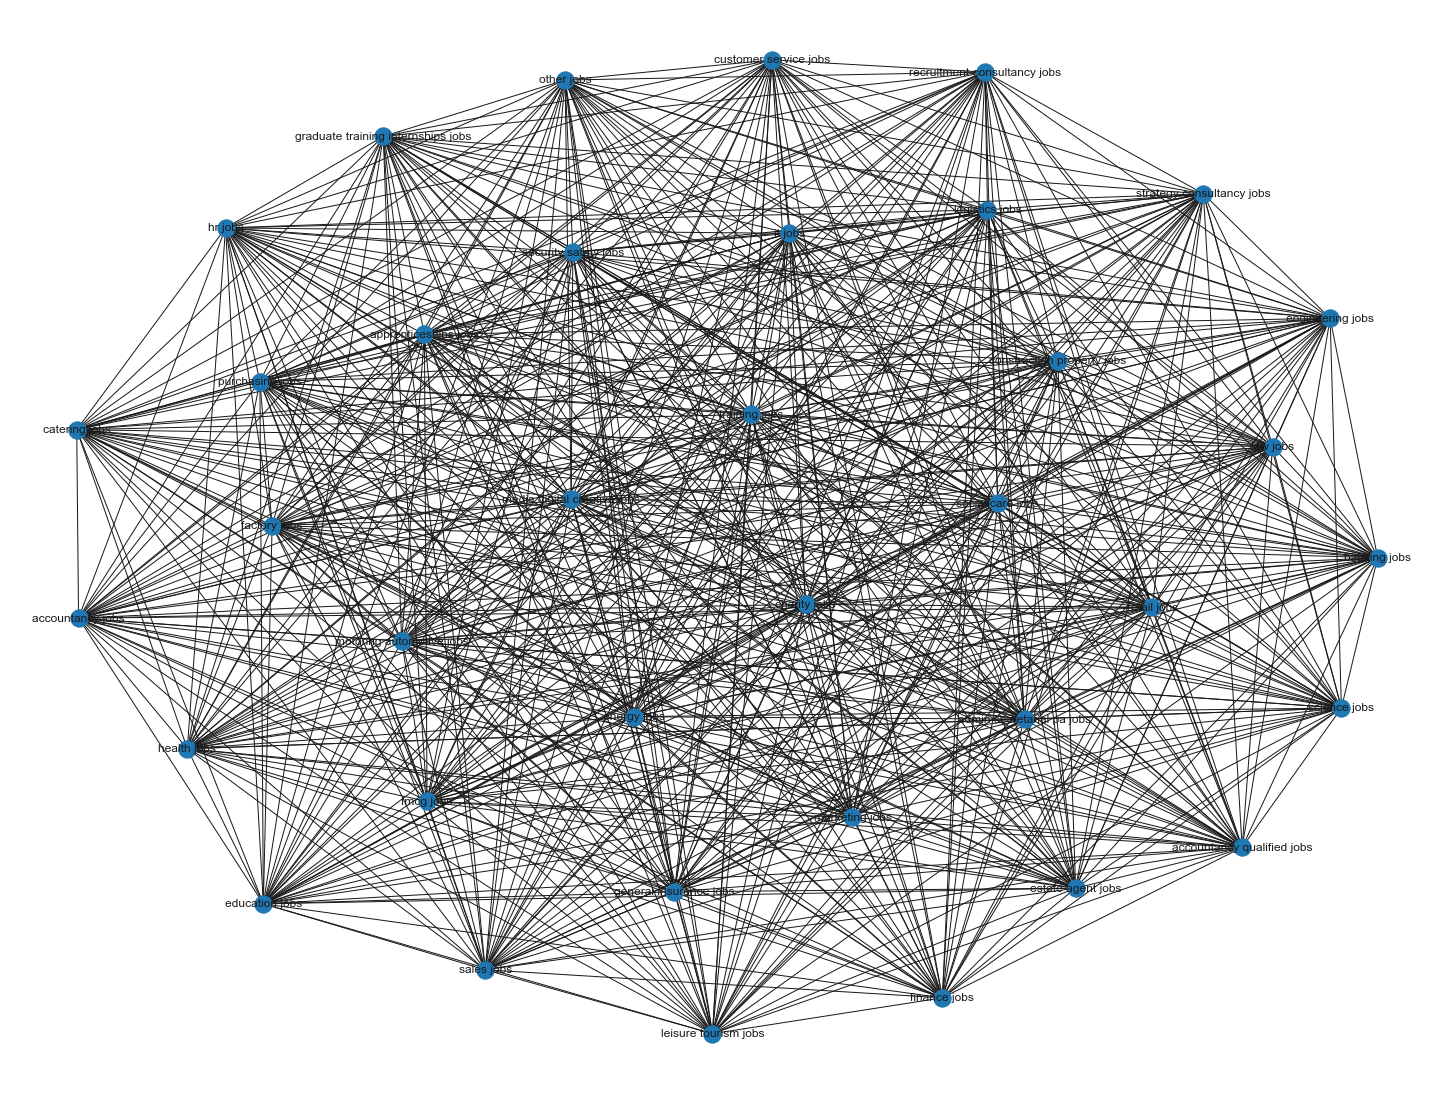

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()



company_listed_categories = data[data["company_name"].str.contains("wild recruitment")]["category"].unique()
for company_listed_categories in data.groupby('company_name')['category'].agg(['unique'])["unique"].values: 
    for index, categ in enumerate(company_listed_categories):
        for i in range(index+1, len(company_listed_categories)):
            G.add_edge(categ,company_listed_categories[i])
        
nx.draw(G, with_labels=True)
plt.show()



In [57]:
sorted(d for n, d in G.degree())

[36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36]

In [78]:
dict(nx.all_pairs_shortest_path(G))['accountancy jobs']

{'accountancy jobs': ['accountancy jobs'],
 'logistics jobs': ['accountancy jobs', 'logistics jobs'],
 'engineering jobs': ['accountancy jobs', 'engineering jobs'],
 'admin secretarial pa jobs': ['accountancy jobs',
  'admin secretarial pa jobs'],
 'other jobs': ['accountancy jobs', 'other jobs'],
 'factory jobs': ['accountancy jobs', 'factory jobs'],
 'hr jobs': ['accountancy jobs', 'hr jobs'],
 'customer service jobs': ['accountancy jobs', 'customer service jobs'],
 'purchasing jobs': ['accountancy jobs', 'purchasing jobs'],
 'fmcg jobs': ['accountancy jobs', 'fmcg jobs'],
 'estate agent jobs': ['accountancy jobs', 'estate agent jobs'],
 'science jobs': ['accountancy jobs', 'science jobs'],
 'catering jobs': ['accountancy jobs', 'catering jobs'],
 'social care jobs': ['accountancy jobs', 'social care jobs'],
 'charity jobs': ['accountancy jobs', 'charity jobs'],
 'general insurance jobs': ['accountancy jobs', 'general insurance jobs'],
 'security safety jobs': ['accountancy jobs', 's

In [75]:
coocurrence_dict = {}
for company_listed_categories in data.groupby('company_name')['category'].agg(['unique'])["unique"].values: 
    for index, categ in enumerate(company_listed_categories):
        for i in range(index+1, len(company_listed_categories)):
            ocurrence_pair = frozenset([categ,company_listed_categories[i]])
            
            if ocurrence_pair in coocurrence_dict:
                coocurrence_dict[ocurrence_pair] += 1
                
            else:
                coocurrence_dict[ocurrence_pair] = 1
            
coocurrence_list = []
for key in coocurrence_dict.keys():
    x, y = key
    coocurrence_list.append([x,y, coocurrence_dict[key]])
    
coocurrence_df = pd.DataFrame(coocurrence_list, columns =['job1', 'job2', 'num_ocurrence'])

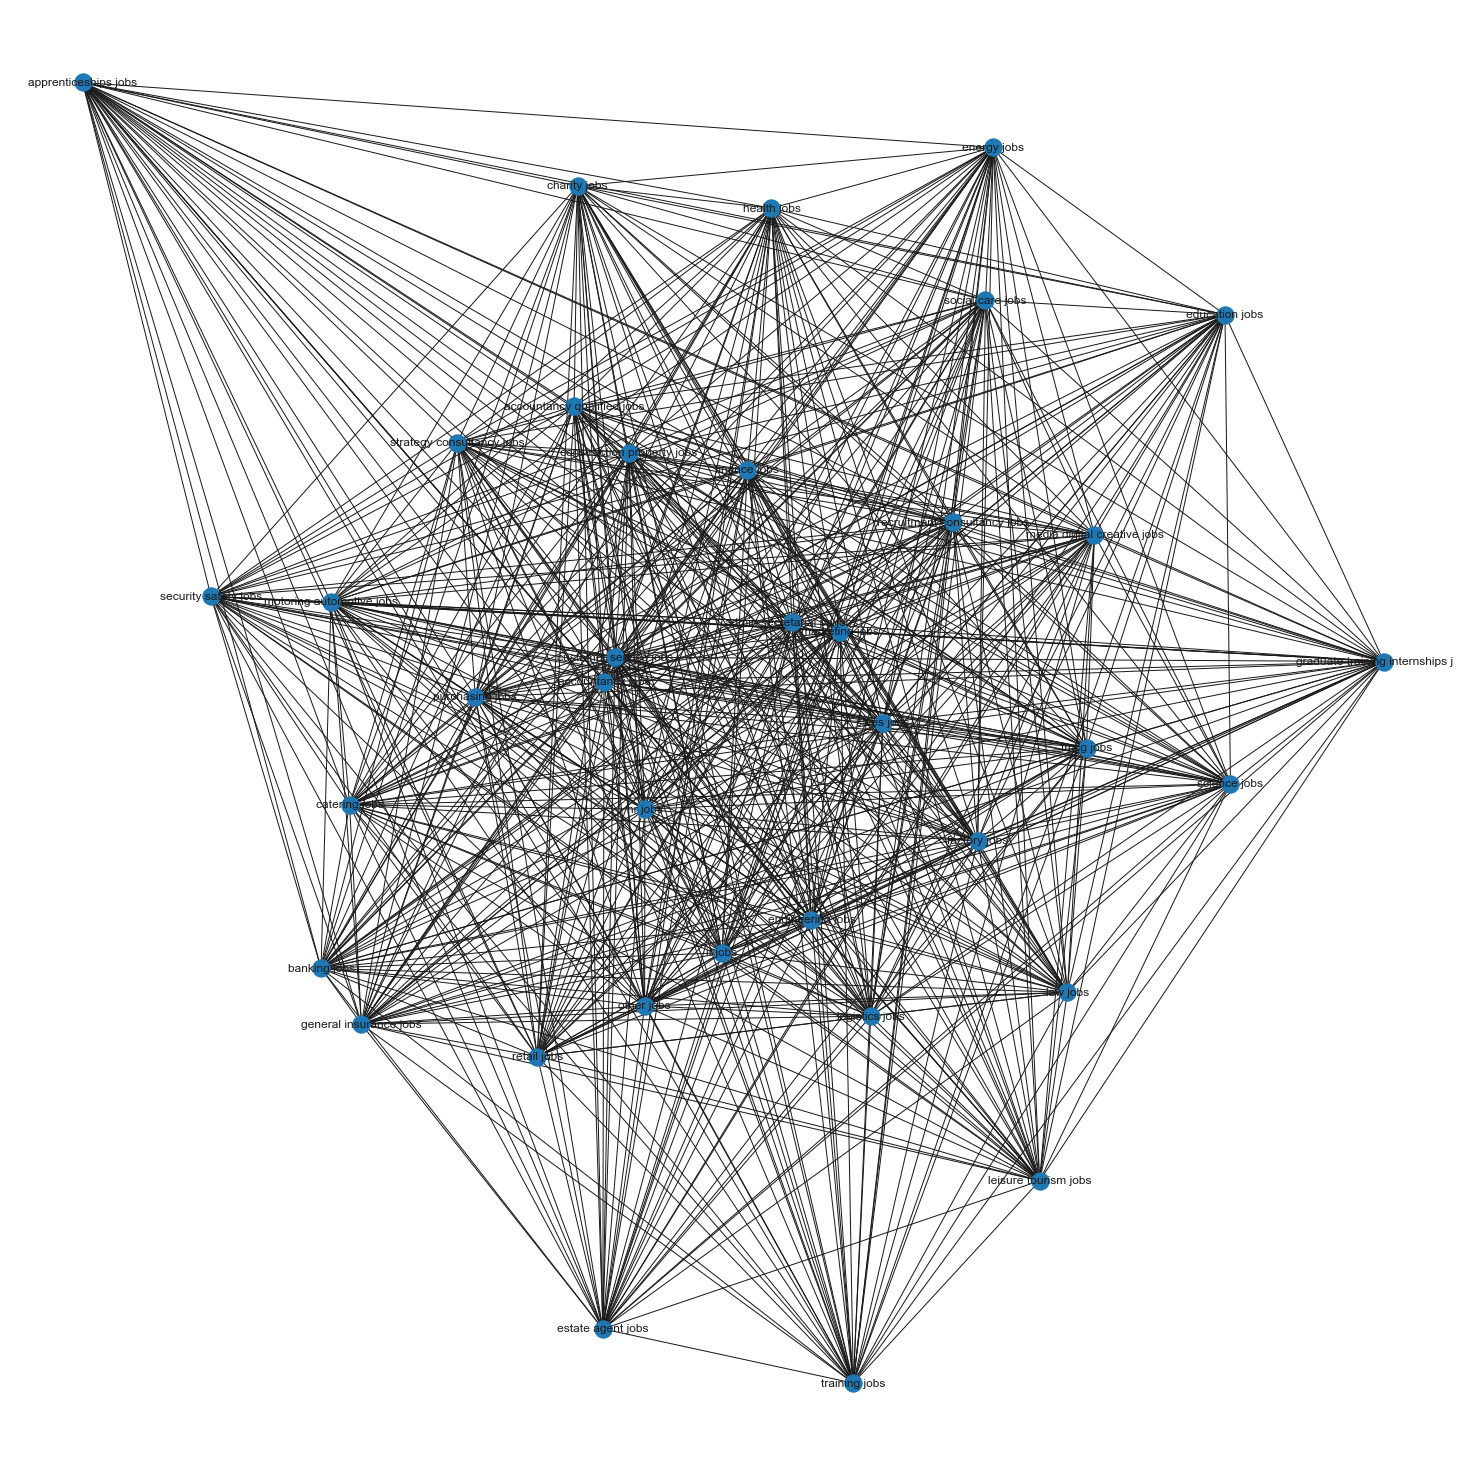

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()



for company_listed_categories in data.groupby('company_name')['category'].agg(['unique'])["unique"].values: 
    for index, categ in enumerate(company_listed_categories):
        for i in range(index+1, len(company_listed_categories)):
            if G.has_edge(categ,company_listed_categories[i]):
                G[categ][company_listed_categories[i]]['weight'] += 1
                
            else:
                G.add_edge(categ,company_listed_categories[i], weight=1)
                
        
nx.draw(G, with_labels=True)
plt.show()


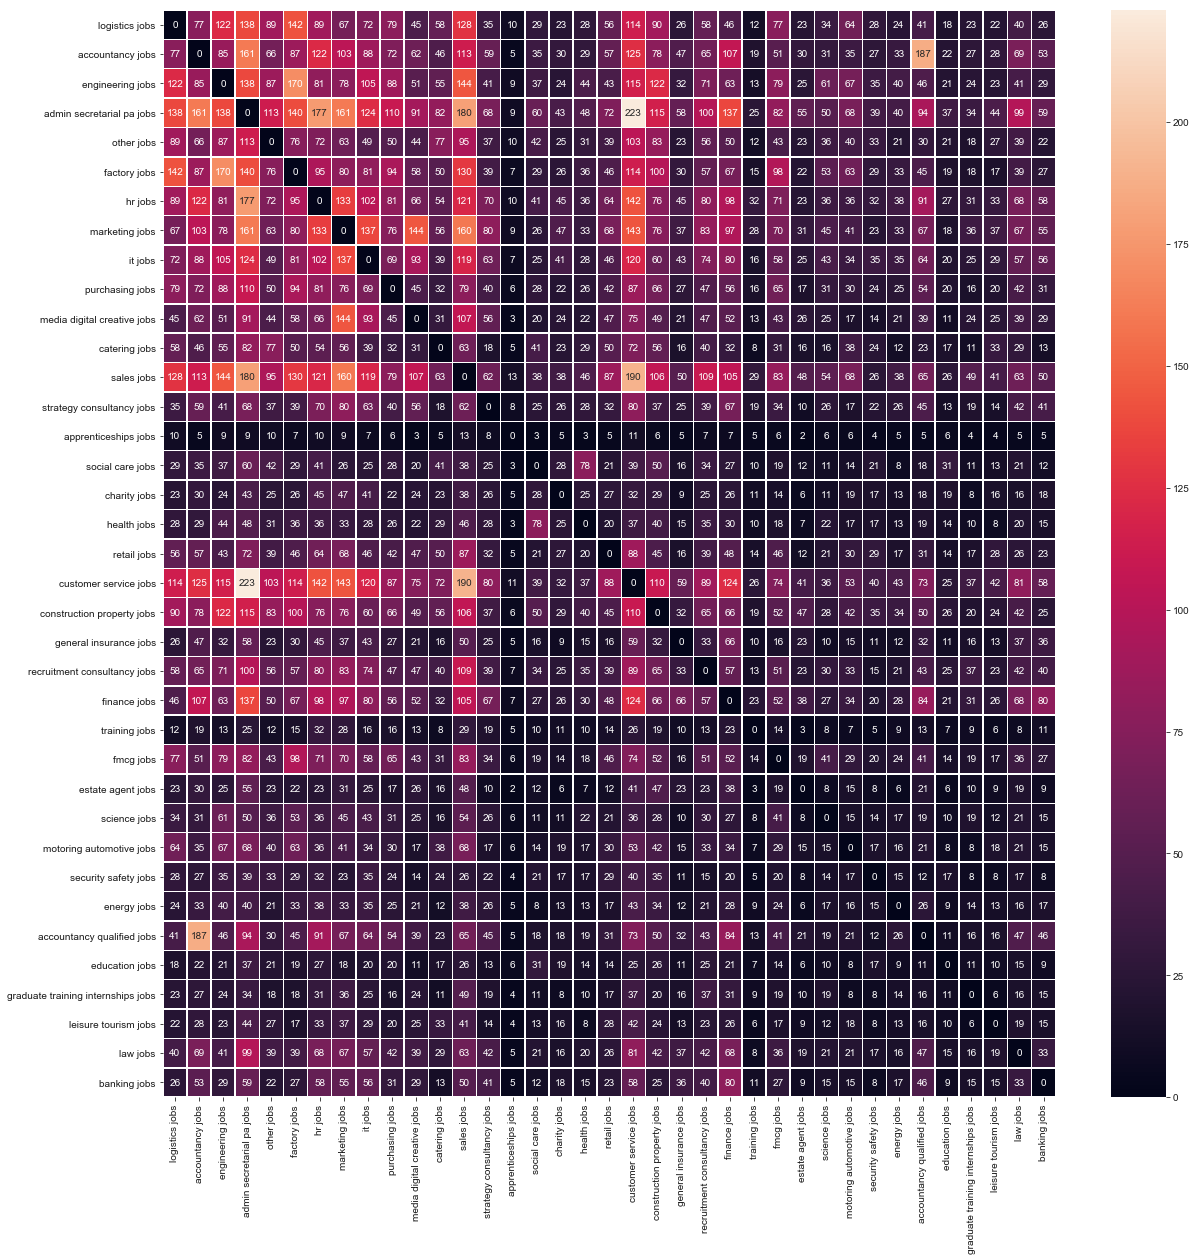

In [4]:

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(nx.to_pandas_adjacency(G, dtype=int), annot=True, fmt="d", linewidths=.5, ax=ax)
sns.set(rc={'figure.figsize':(20,20), "font.size":8,"axes.titlesize":8,"axes.labelsize":8})
sns.set(font_scale=1)

In [44]:
data_indexed_by_company = data.copy().set_index('company_name')

df_array = []
for company in data_indexed_by_company.index.unique():
    ordered_dates = data_indexed_by_company.loc[[company]].sort_values(by=['post_date'])['post_date'].values
    
    diff_array = []
    index_last_date = len(ordered_dates) - 1
    for index, listed_date in enumerate(ordered_dates):
        if index == index_last_date:
            continue
        diff_array.append((ordered_dates[index+1]-listed_date).astype('timedelta64[D]').astype(int))
    
    
    mean_of_days = statistics.mean(diff_array) if len(diff_array) > 0 else None 
    std_of_days = statistics.stdev(diff_array) if len(diff_array) > 1 else None
    last_date = ordered_dates[-1] if len(diff_array) > 0 else None 
    company
    
    df_array.append([company, len(ordered_dates), mean_of_days, std_of_days, last_date])
    
    
df_of_statistics_by_day_posted = pd.DataFrame(df_array, 
                                              columns =['company', 'num_of_listings',
                                                                  'mean_of_days_between_listings', 
                                                        'stdev_of_days_between_listings', 'last_listing'])   

Text(0.5,1,'Boxplot of mean of days between listings')

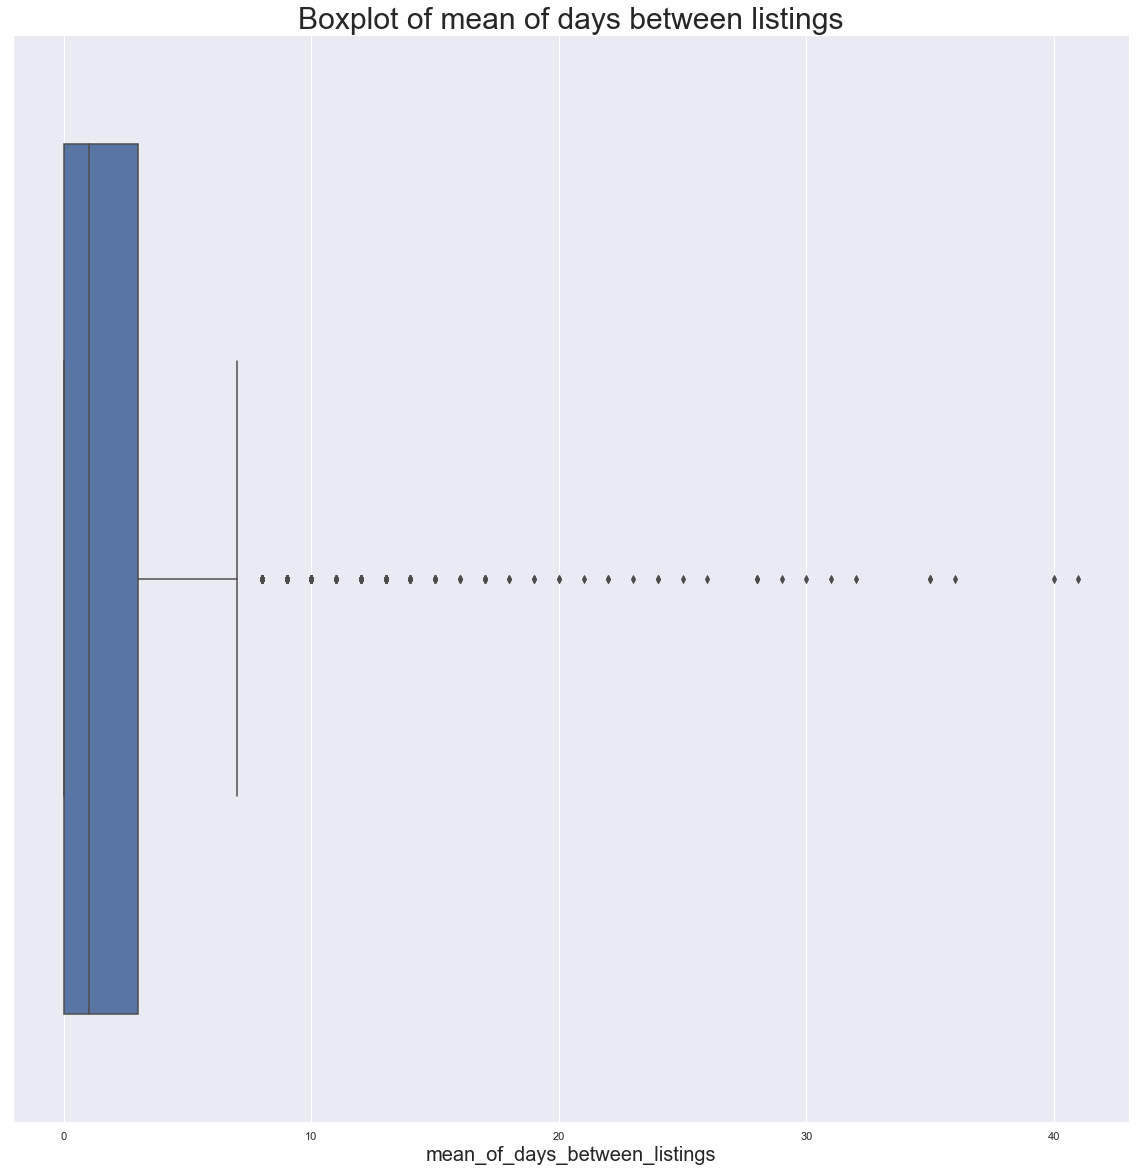

In [45]:

ax = sns.boxplot(x=df_of_statistics_by_day_posted["mean_of_days_between_listings"])
sns.set(rc={'figure.figsize':(20,20), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
plt.title('Boxplot of mean of days between listings')

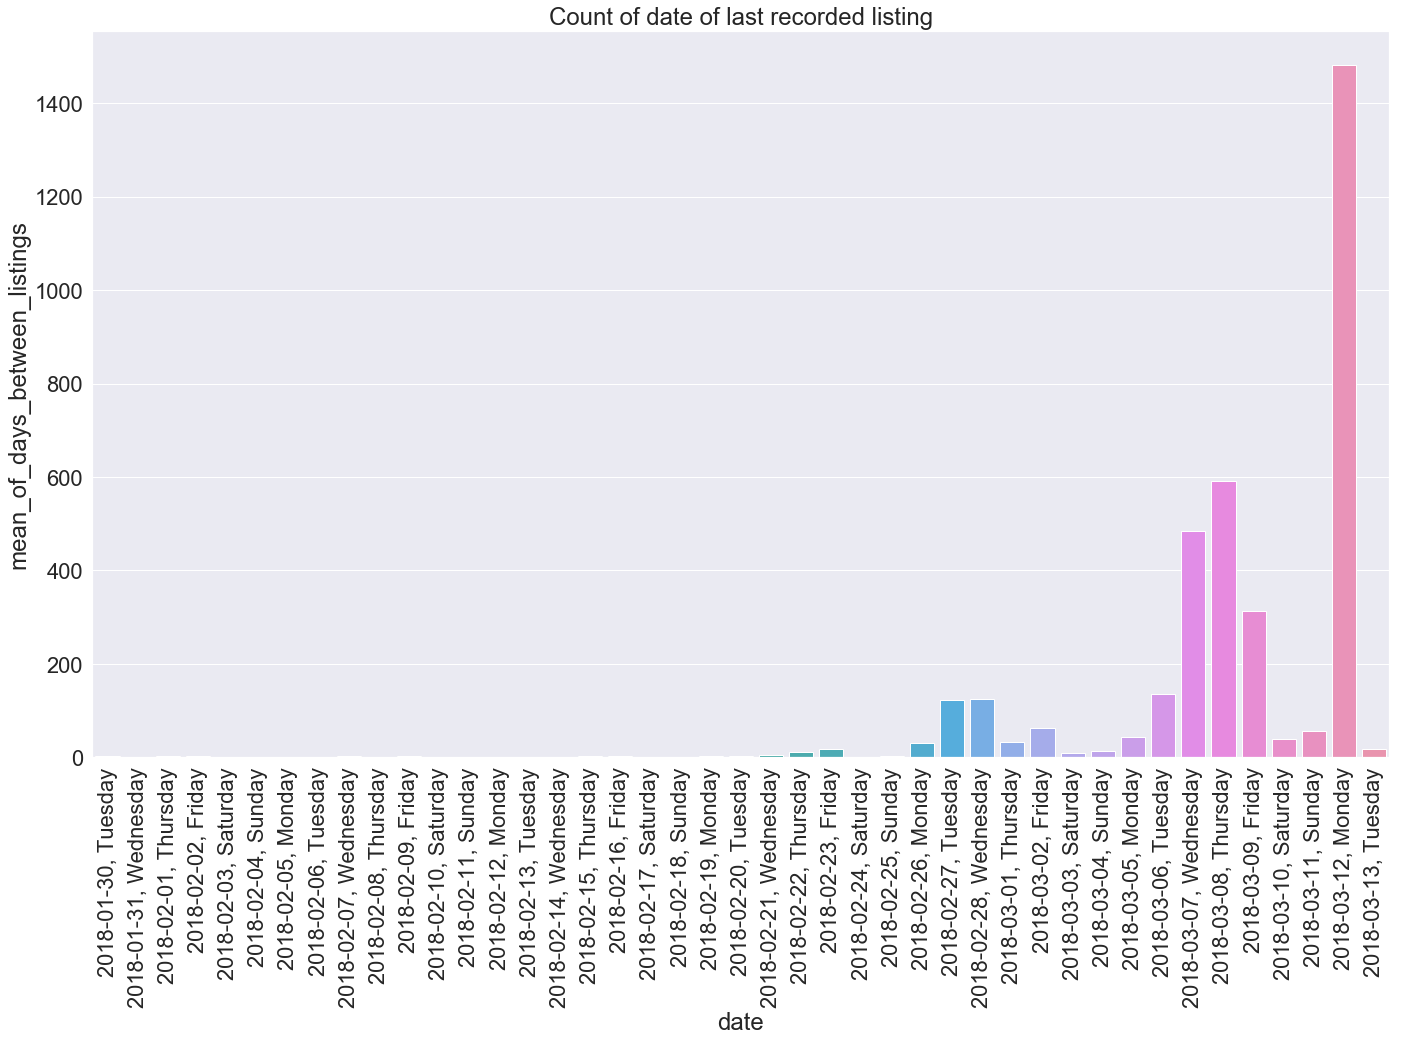

In [58]:
data_date = df_of_statistics_by_day_posted.set_index("last_listing")
num_listings_by_month = data_date.resample("D").count().reset_index()
num_listings_by_month["date"] = num_listings_by_month['last_listing'].apply(lambda x: x.strftime('%Y-%m-%d, %A'))

sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of date of last recorded listing')
ax = sns.barplot(x="date", y="mean_of_days_between_listings", data=num_listings_by_month)

plt.xticks(rotation=90)
plt.tight_layout()

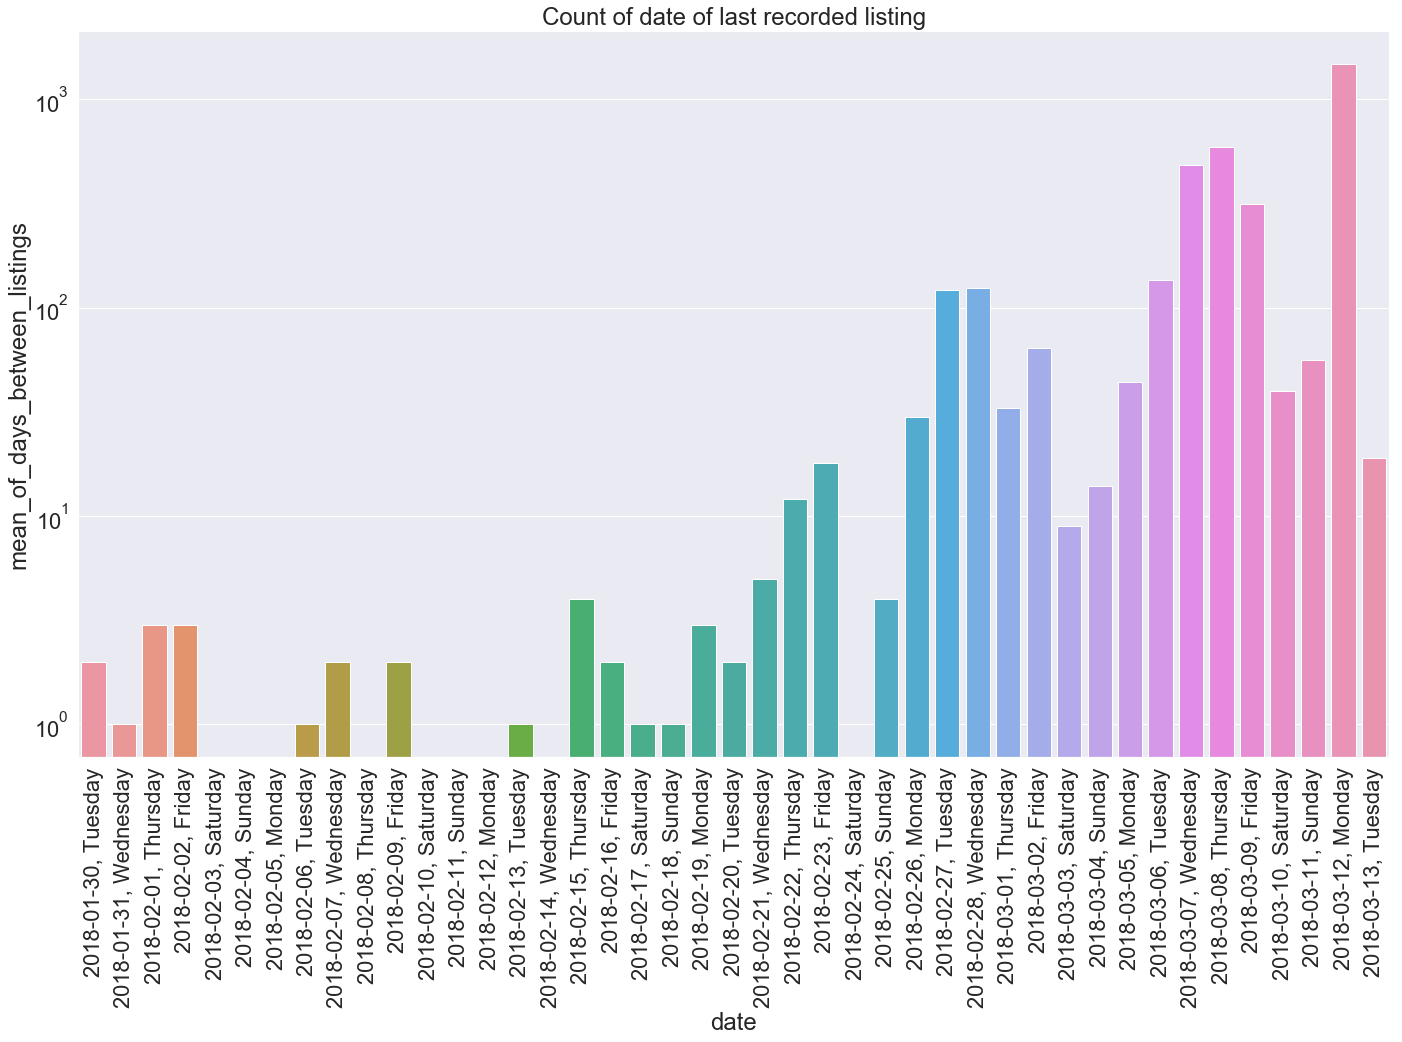

In [65]:
data_date = df_of_statistics_by_day_posted.set_index("last_listing")
num_listings_by_month = data_date.resample("D").count().reset_index()
num_listings_by_month["date"] = num_listings_by_month['last_listing'].apply(lambda x: x.strftime('%Y-%m-%d, %A'))

sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of date of last recorded listing')
ax = sns.barplot(x="date", y="mean_of_days_between_listings", data=num_listings_by_month)
ax.set_yscale("log")
plt.xticks(rotation=90)
plt.tight_layout()

In [54]:
df_of_statistics_by_day_posted

company  num_of_listings  \
0                            Haulfryn Group                 2   
1                                      Reed               804   
2                 Swanstaff Recruitment Ltd                49   
3                        Castles Solicitors                 1   
4                         Marketplace Group                14   
...                                      ...              ...   
5161     Barclay Simpson Associates Limited                 1   
5162                   Oceandusk UK Limited                 1   
5163         Fun Active Creative Events Ltd                 1   
5164  Carl Kammerling International Limited                 1   
5165                Concept Human Solutions                 1   

      mean_of_days_between_listings  stdev_of_days_between_listings  \
0                               0.0                             NaN   
1                               0.0                             0.0   
2                               0.0                             1.0   
3                               NaN                             NaN   
4                               0.0                             1.0   
...                             ...                             ...   
5161                            NaN                             NaN   
5162                            NaN                             NaN   
5163                            NaN                             NaN   
5164                            NaN                             NaN   
5165                            NaN                             NaN   

     last_listing  
0      2018-03-12  
1      2018-03-12  
2      2018-03-12  
3             NaT  
4      2018-03-12  
...           ...  
5161          NaT  
5162          NaT  
5163          NaT  
5164          NaT  
5165          NaT  

[5166 rows x 5 columns]

In [66]:
data.job_type.unique()

array(['Permanent, full-time', 'Permanent, full-time or part-time',
       'Permanent, part-time', 'Contract, full-time',
       'Temporary, part-time', 'Temporary, full-time or part-time',
       'Temporary, full-time', 'Contract, full-time or part-time',
       'Contract, part-time'], dtype=object)

In [79]:
data[['contract_type', 'contract_time']] = data.apply(lambda row: separate_job_type(row), axis=1, result_type="expand")

In [75]:
def separate_job_type(row):
    contract_type, contract_time = row.job_type.split(', ')
    return contract_type, contract_time

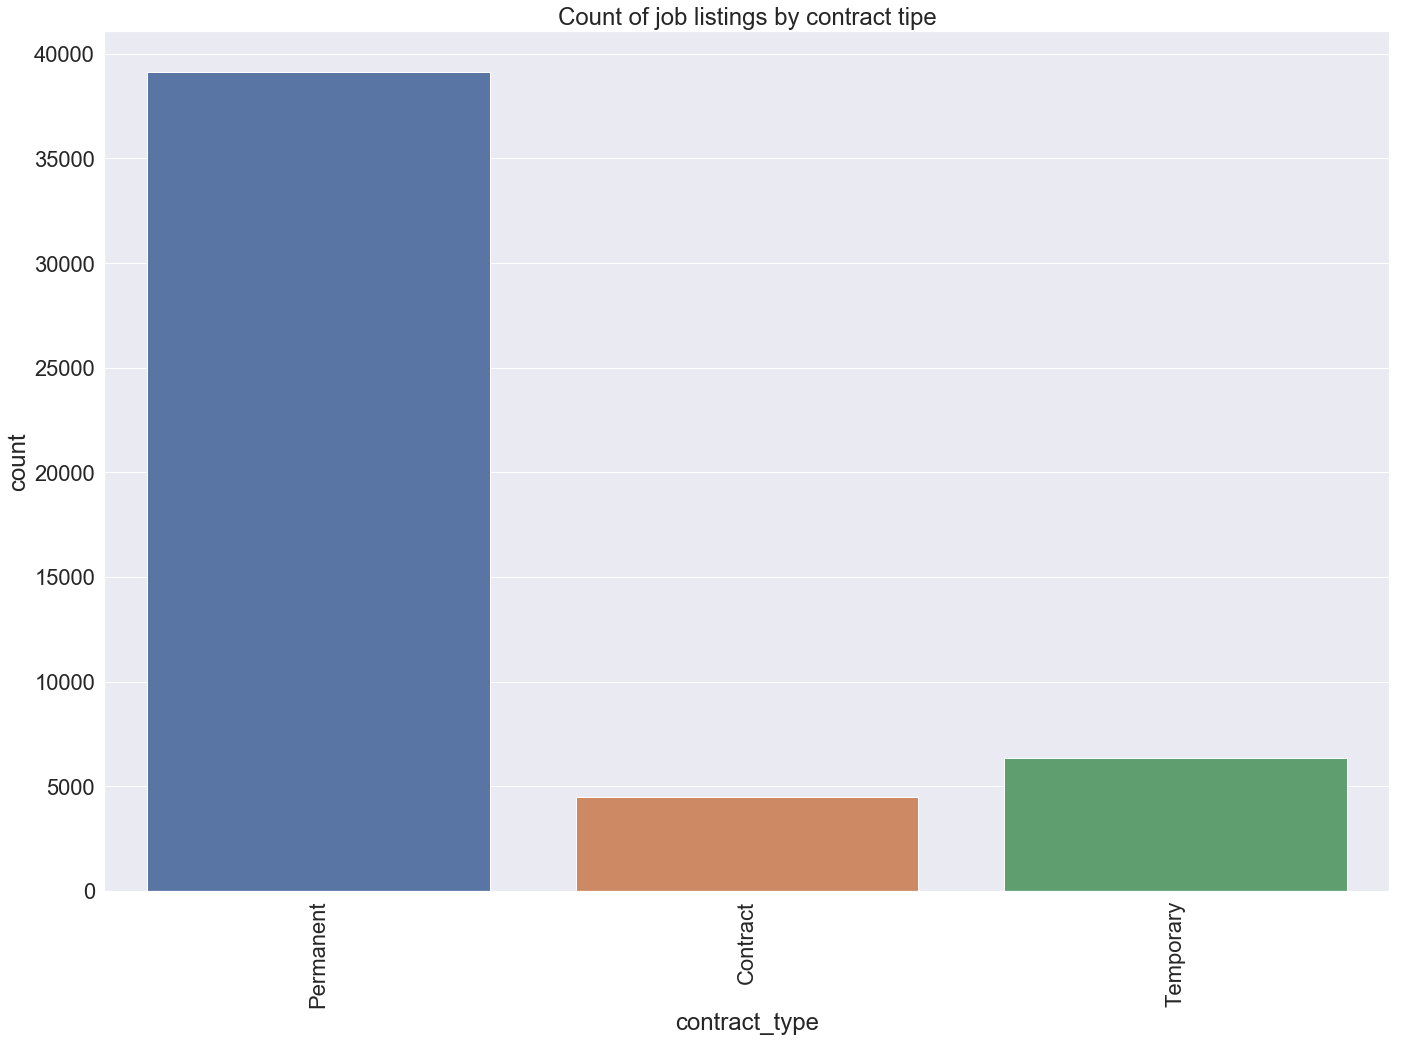

In [82]:
sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of job listings by contract tipe')
ax = sns.countplot(x="contract_type", data=data)
plt.xticks(rotation=90)
plt.tight_layout()

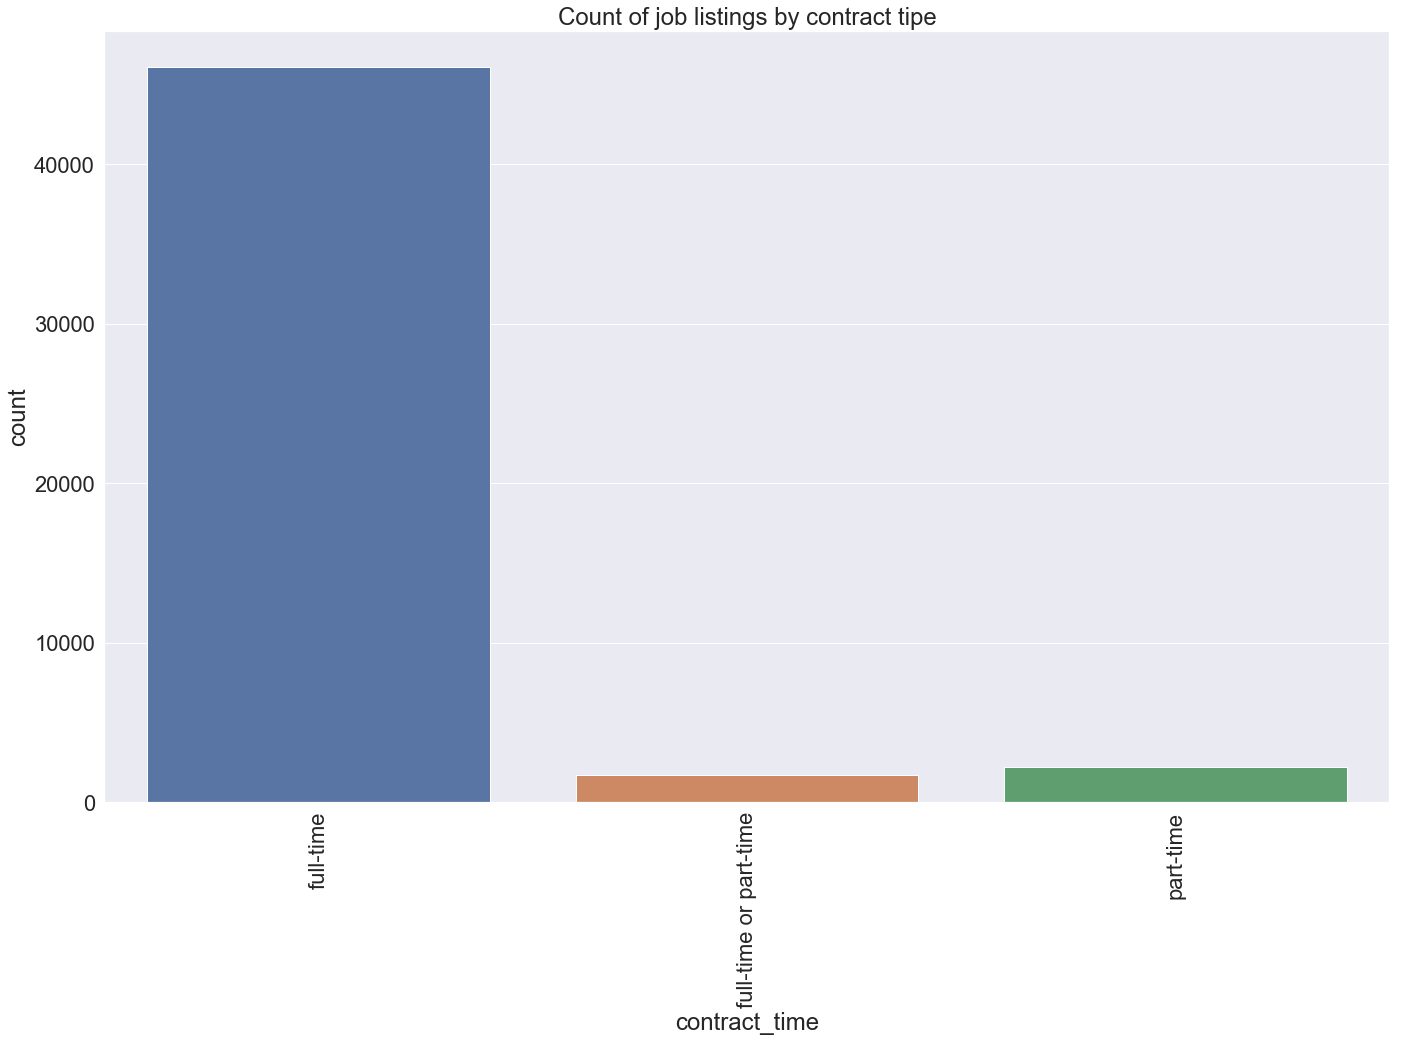

In [83]:
sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of job listings by contract tipe')
ax = sns.countplot(x="contract_time", data=data)
plt.xticks(rotation=90)
plt.tight_layout()

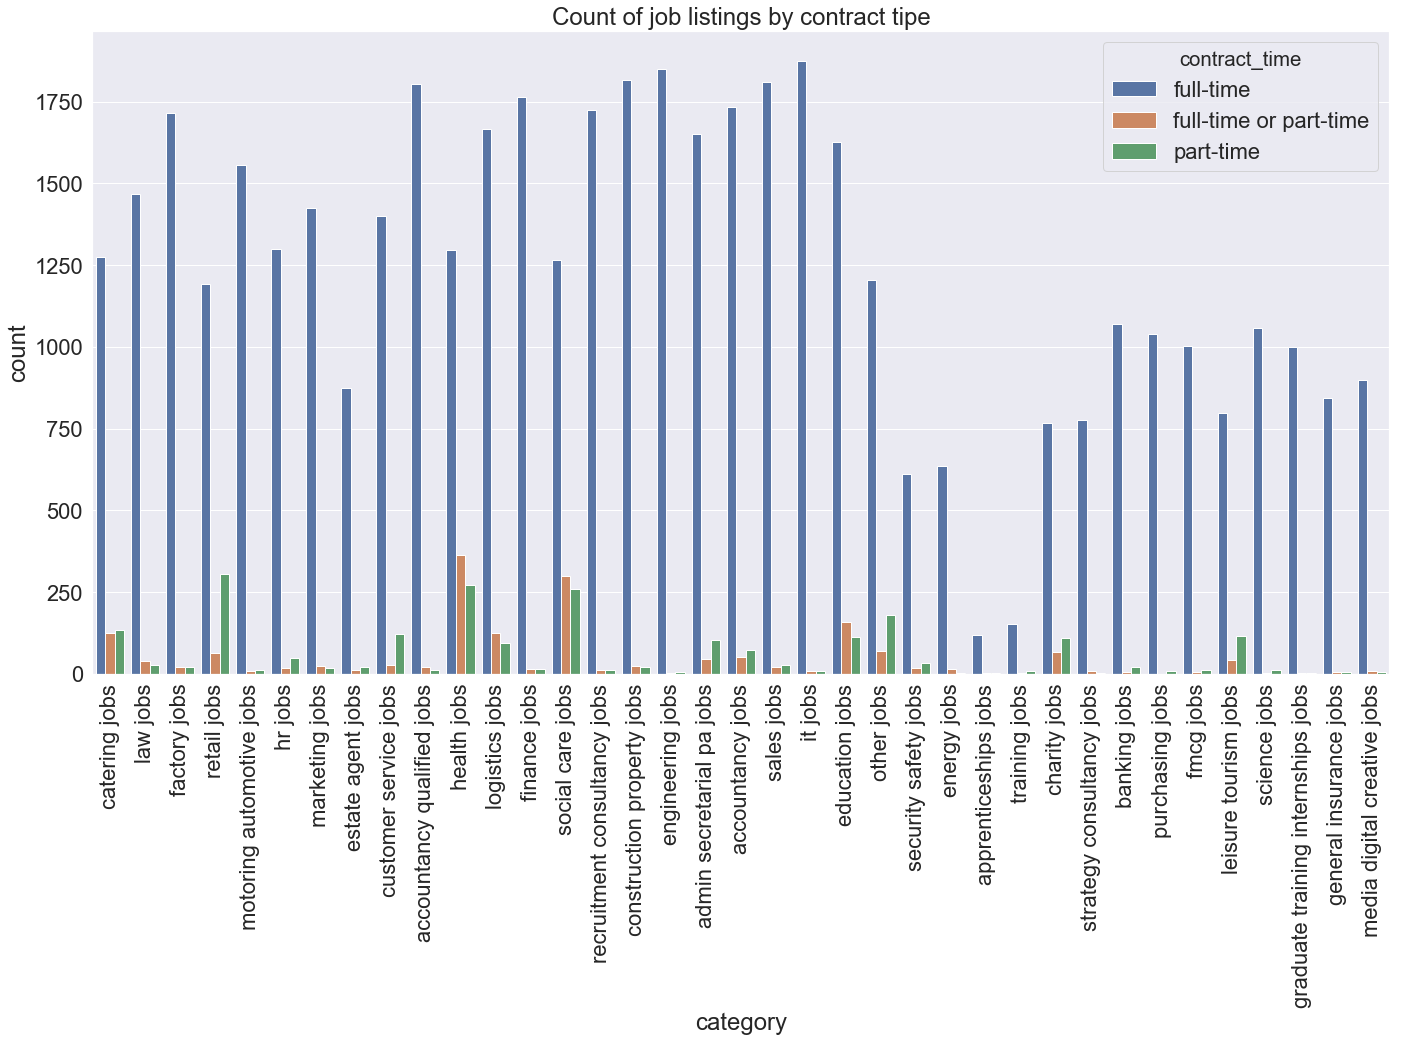

In [85]:
sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of job listings by contract tipe')
ax = sns.countplot(x="category", hue="contract_time", data=data)
plt.xticks(rotation=90)
plt.tight_layout()

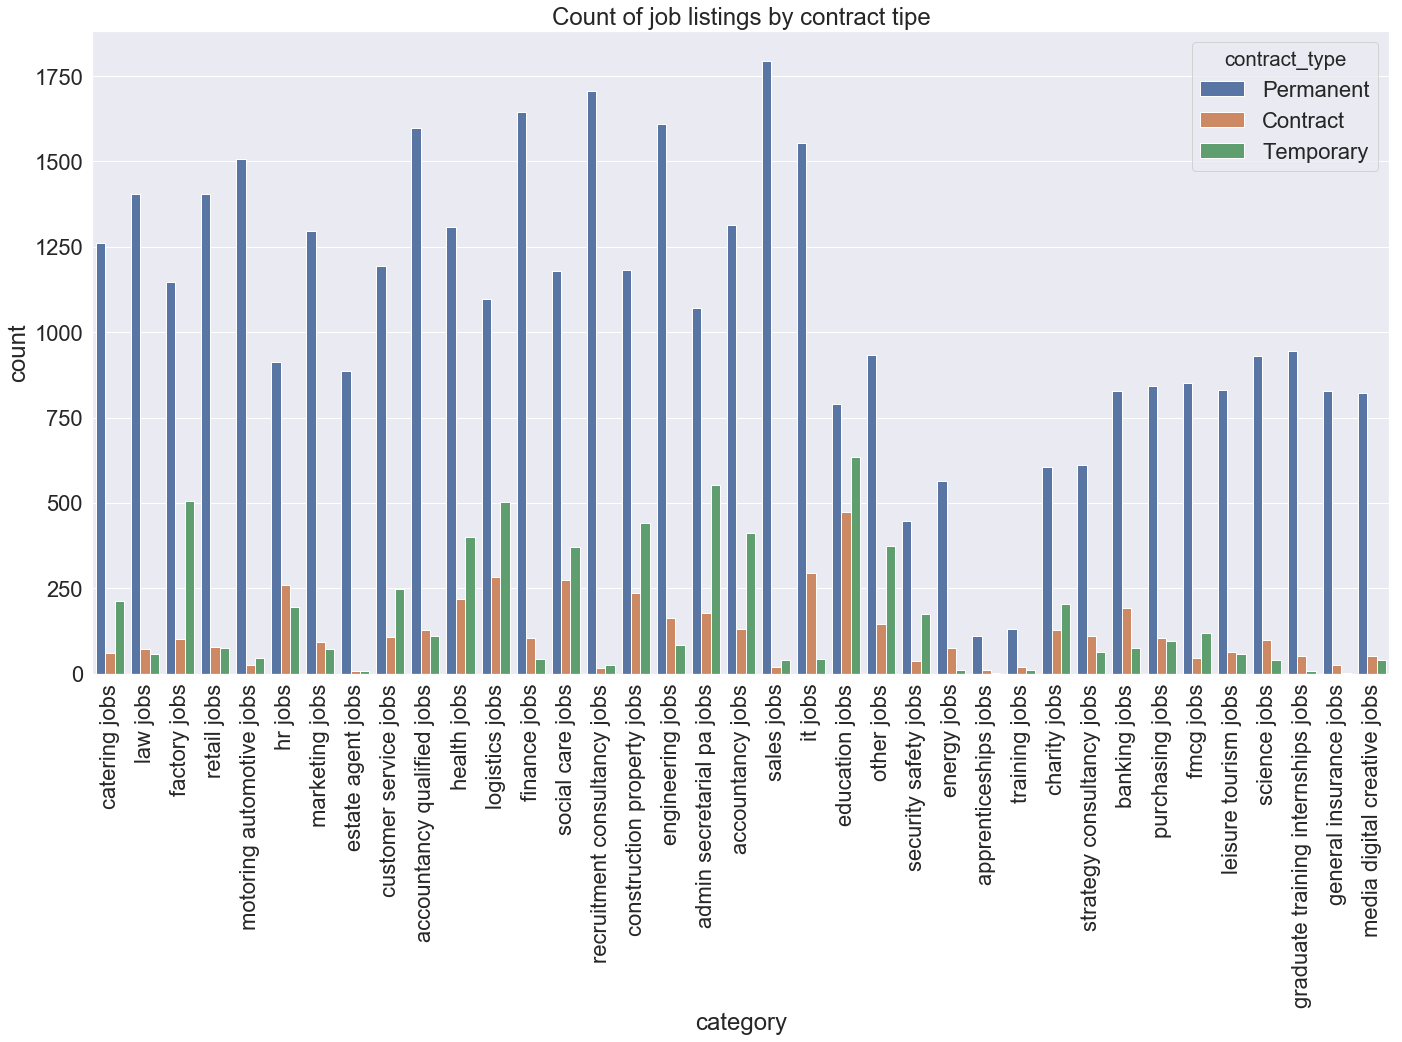

In [86]:
sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of job listings by contract tipe')
ax = sns.countplot(x="category", hue="contract_type", data=data)
plt.xticks(rotation=90)
plt.tight_layout()

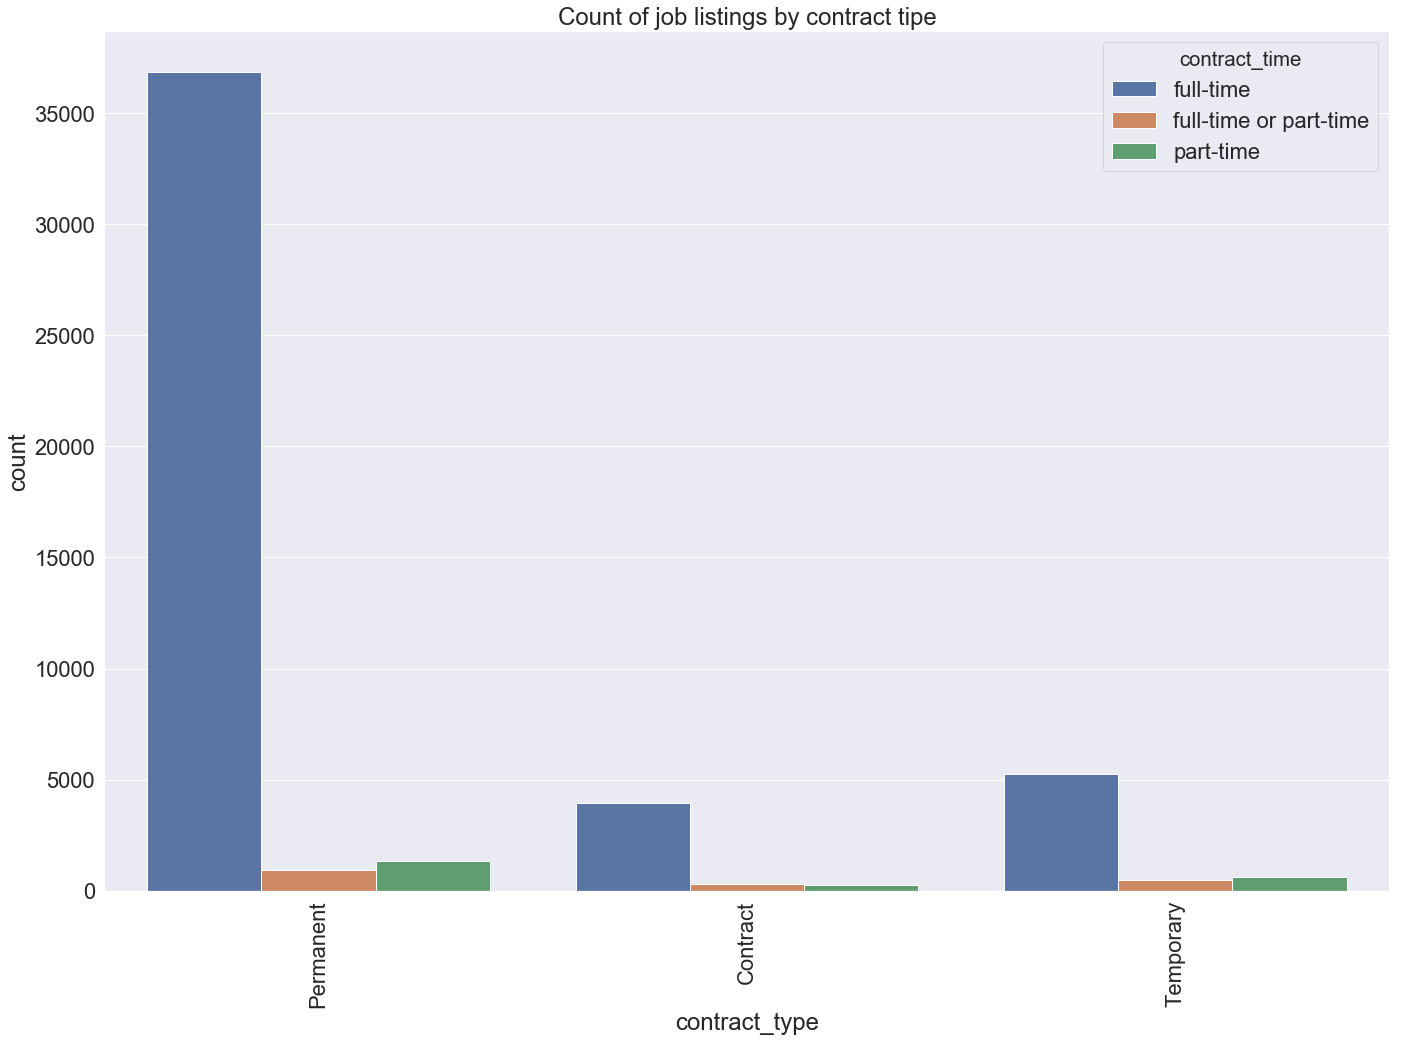

In [87]:
sns.set(rc={'figure.figsize':(20,15), "font.size":20,"axes.titlesize":30,"axes.labelsize":20})
sns.set(font_scale=2)
plt.title('Count of job listings by contract tipe')
ax = sns.countplot(x="contract_type", hue="contract_time", data=data)
plt.xticks(rotation=90)
plt.tight_layout()

In [80]:
data[data["company_name"].str.contains("wild recruitment")]

category           city       company_name geo  \
88                        hr jobs  Milton Keynes  wild recruitment   uk   
1098                 factory jobs        Fareham  wild recruitment   uk   
4370     motoring automotive jobs     Portsmouth  wild recruitment   uk   
4876     motoring automotive jobs     Chichester  wild recruitment   uk   
5922        customer service jobs        Fareham  wild recruitment   uk   
8723        customer service jobs  Waterlooville  wild recruitment   uk   
9246        customer service jobs  Waterlooville  wild recruitment   uk   
10328                finance jobs    Petersfield  wild recruitment   uk   
13490            engineering jobs     Portsmouth  wild recruitment   uk   
14238  construction property jobs     Portsmouth  wild recruitment   uk   
14309            engineering jobs     Portsmouth  wild recruitment   uk   
14670   admin secretarial pa jobs    Petersfield  wild recruitment   uk   
16313                  sales jobs  Milton Keynes  wild recruitment   uk   
26467                factory jobs        Fareham  wild recruitment   uk   
26584                factory jobs        Fareham  wild recruitment   uk   
32392    motoring automotive jobs     Chichester  wild recruitment   uk   
33108                finance jobs    Petersfield  wild recruitment   uk   
35552  accountancy qualified jobs  Milton Keynes  wild recruitment   uk   
37478  construction property jobs     Chichester  wild recruitment   uk   
39124   admin secretarial pa jobs     Portsmouth  wild recruitment   uk   
39235   admin secretarial pa jobs  Milton Keynes  wild recruitment   uk   
42134                  sales jobs     Portsmouth  wild recruitment   uk   
46672        leisure tourism jobs     Portsmouth  wild recruitment   uk   

      job_board                                    job_description  \
88         reed   Apply now This role will work on multiple lea...   
1098       reed   Apply now Location: Fareham Job Title: Electr...   
4370       reed   Apply now HGV Drivers (Class 2) Needed ASAP! ...   
4876       reed   Apply now HGV Drivers (Class 1) Needed ASAP! ...   
5922       reed   Apply now Customer Service Advisor Fareham Fu...   
8723       reed   Apply now Customer Service & Sales (Inbound O...   
9246       reed   Apply now Customer Service / Sales (Inbound O...   
10328      reed   Apply now Complaints OfficerPetersfieldFree P...   
13490      reed   Apply now Multi-Skilled Electrical / Mechanic...   
14238      reed   Apply now Location: Portsmouth Pay: Â£7.50 - ...   
14309      reed   Apply now Commercial / Domestic Window Survey...   
14670      reed   Apply now Data Entry and ProcessingPetersfiel...   
16313      reed   Apply now I am recruiting for a New Business ...   
26467      reed   Apply now Location: Fareham Job Title: Assemb...   
26584      reed   Apply now Location: Fareham Job Title: Electr...   
32392      reed   Apply now HGV Drivers (Class 1) Needed ASAP! ...   
33108      reed   Apply now Inbound Sales AdvisorRetail Backgro...   
35552      reed   Apply now Are you a finance manager looking f...   
37478      reed   Apply now Project SupportChichesterÂ£25,000 -...   
39124      reed   Apply now Location is: Cosham, Portsmouth Hou...   
39235      reed   Apply now Are you available immediately? Do h...   
42134      reed   Apply now Customer Service Department & Accou...   
46672      reed   Apply now Hotel Reception ManagerUp to Â£24,0...   

                                        job_requirements  \
88                                                   NaN   
1098    Required skills Manufacturing Soldering Mecha...   
4370    Required skills Driver Multi-drop Delivery Ti...   
4876    Required skills Driver Multi-drop Delivery Ti...   
5922    Required skills sales inbound customer servic...   
8723                                                 NaN   
9246                                                 NaN   
10328                                                NaN   
134

In [4]:
pip install matplotlib==2.2.3

     |████████████████████████████████| 13.8MB 7.1MB/s eta 0:00:01
  Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
Note: you may need to restart the kernel to use updated packages.
